# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 1 

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

## Coding Practices

- Dataframe `df` is the original data.
- `updated_df` is a copy of the original dataframe `df` and the continuously updated dataframe:
    - We continuously updated this dataframe, by adding columns, modifying values etc, so that we can have access to the previously performed work in one dataframe.

- For certain operations and questions a new copy of the `updated_df` will be created:
    - This is done for operations where we did not want to add or change the `updated_df` dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Question 1: Data Cleaning

In [2]:
df = pd.read_csv('logbook_assignment1.csv')
updated_df = df.copy()

# View initial first few rows
updated_df.head()

C:\Users\nihal\AppData\Local\Temp\ipykernel_31808\3910934586.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


[1.1] Date Fields: 1. Identify what percentage of date_fueled entries that are not proper dates.
- Checking valid date for any order of `mmm dd yyyy`

In [3]:
from dateutil.parser import parse

# Function to check if an entry is a valid date
def is_valid_date(date_str):
    if isinstance(date_str, str) and date_str.strip():
        try:
            parse(date_str, fuzzy=False) # fuzzy paramter ensures that the parsing is strict and does not allow partial matches.
            return True
        except ValueError:
            return False
    return False

is_valid_date_series = updated_df['date_fueled'].apply(is_valid_date)

total_entries = len(updated_df)
improper_dates_count = is_valid_date_series.value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100


print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 135126
Percentage of improper dates: 11.50%


[1.1] Date Fields: 2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy.

In [4]:
# Function to fill in date_fueled with date_captured if date_fueled is invalid
def fill_invalid_date(row):
    if not is_valid_date(row['date_fueled']):
        if is_valid_date(row['date_captured']):
            return row['date_captured']
    return row['date_fueled']

# Apply the function to the Dataframe
updated_df['date_fueled'] = updated_df.apply(fill_invalid_date, axis=1)

# Applying valid to check the correctness of the changes
valid_date_filled_series = updated_df['date_fueled'].apply(is_valid_date)

total_entries = len(updated_df)
improper_dates_count = valid_date_filled_series.value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100

print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 0
Percentage of improper dates: 0.00%


[1.1] Date Fields: 3. Convert the column to a date format, setting any invalid date fueled entries
to NaT.

In [5]:
# Convert the date_fueled and date_captured column to datetime, setting invalid entries to NaT
updated_df['date_fueled'] = pd.to_datetime(updated_df['date_fueled'], errors='coerce')
updated_df['date_captured'] = pd.to_datetime(updated_df['date_captured'], errors='coerce')

display(updated_df[['date_fueled', 'date_captured']])

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,date_fueled,date_captured
0,2022-04-07,2022-04-07
1,2012-11-07,2016-08-30
2,2012-09-22,2012-09-28
3,2019-05-04,2019-05-04
4,2022-02-15,2022-02-15
...,...,...
1174865,2020-02-19,2020-02-19
1174866,2019-12-06,2019-12-06
1174867,2021-10-04,2021-10-04
1174868,2021-07-26,2021-07-26


[1.1] Date Fields: 4. Remove dates that are in the future, or dates that are earlier than 2005.
- Removing dates for both `date_fueled` and `date_captured` in this range:

    * Consistency Across Columns: If one column (`date_fueled` or `date_captured`) has a valid date while the other column has an invalid date (in the future or before 2005), it could lead to inconsistencies. For example, analyzing time differences between fueling and capturing, such inconsistencies could distort the results.

    * Simplification: By removing invalid dates from both columns, it simplifies the data cleaning process, ensuring that all remaining records are within the valid date range.

In [6]:
from datetime import datetime

# Define the date range
start_date = datetime(2005, 1, 1)
end_date = datetime.now()

# Filter out dates that are in the future or earlier than 2005
updated_df = updated_df[(updated_df['date_fueled'] >= start_date) & (updated_df['date_fueled'] <= end_date)]
updated_df = updated_df[(updated_df['date_captured'] >= start_date) & (updated_df['date_captured'] <= end_date)]

[1.1] Date Fields: 5. Plot the distribution of fueling dates and comment on the results.

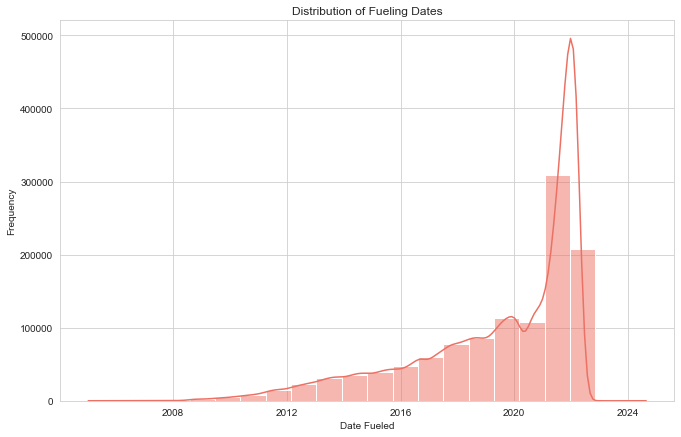

In [7]:
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.histplot(updated_df['date_fueled'].dropna(),
                bins='sturges',
                stat='count',
                kde=True,
                color='#ec7063')
plt.title('Distribution of Fueling Dates')
plt.xlabel('Date Fueled')
plt.ylabel('Frequency')
plt.savefig('./Plots/Plots[1.1-5]/fueling_dates_distribution.png')
plt.show()

The histogram shows the distribution of valid fueling dates within the specificed range (from 2005 to the current date). 
1. Distribution of Fueling Dates:
    * The data seems to be heavily skewed towards the more recent dates.
    * The KDE line peaks significantly towards the right-hand side of the plot, suggesting that most of the refueling entries occurred within a more condensed recent time period.

2. Historical Refueling Activity:
    * There is a gradual increase in the number of entries over time, with a sharp rise as you approach the more recent dates.
    * This could indicate that the dataset either has more recent entries or that vehicle refueling was recorded more frequently as time progressed.

3. Binning:
    * The histogram bins are wide enough to capture general trends, but there might be clustering towards specific time periods, which the KDE line emphasizes.

[1.2] Numeric Fields: 1. Identify what percentage of gallons, miles, and odometer entries are missing.

In [8]:
# Calculate the percentage of missing values in each of the specified columns
columns = ['gallons', 'miles', 'odometer']
percent_missing = updated_df[columns].isnull().mean() * 100

for column, percentage in percent_missing.items():
    print(f"Percentage of missing entries in '{column}': {percentage:.2f}%")

Percentage of missing entries in 'gallons': 6.33%
Percentage of missing entries in 'miles': 87.60%
Percentage of missing entries in 'odometer': 12.65%


[1.2] Numeric Fields: 2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it.

In [9]:
# Convert odometer, gallons and miles to floats
updated_df['gallons'] = updated_df['gallons'].astype(str)
updated_df['gallons'] = updated_df['gallons'].str.replace(',', '').str.strip()
updated_df['gallons'] = pd.to_numeric(updated_df['gallons'], errors='coerce')

updated_df['miles'] = updated_df['miles'].astype(str)
updated_df['miles'] = updated_df['miles'].str.replace(',', '').str.strip()
updated_df['miles'] = pd.to_numeric(updated_df['miles'], errors='coerce')

updated_df['mpg'] = updated_df['mpg'].astype(str)
updated_df['mpg'] = updated_df['mpg'].str.replace(',', '').str.strip()
updated_df['mpg'] = pd.to_numeric(updated_df['mpg'], errors="coerce")

# Display the dataframe to check conversion and missing values
print(f'Conversion to float to check for conversion errors.')
display(updated_df[['gallons', 'miles', 'mpg']].head())

# Function to calculate missing values
def fill_missing_values(row):
    if pd.isnull(row['miles']) and pd.notnull(row['gallons']) and pd.notnull(row['mpg']):
        row['miles'] = row['gallons'] * row['mpg']
    elif pd.isnull(row['gallons']) and pd.notnull(row['miles']) and pd.notnull(row['mpg']):
        row['gallons'] = row['miles'] / row['mpg']
    elif pd.isnull(row['mpg']) and pd.notnull(row['miles']) and pd.notnull(row['gallons']):
        row['mpg'] = row['miles'] / row['gallons']
    return row

# Apply the function to each row in the DataFrame
updated_df = updated_df.apply(fill_missing_values, axis=1)

print(f'After applying missing values function.')
display(updated_df[['gallons','miles','mpg']].head())

Conversion to float to check for conversion errors.


,gallons,miles,mpg
0,NaN,NaN,NaN
1,12.120,NaN,31.6
2,7.991,NaN,28.5
3,10.575,NaN,46.8
4,11.651,244.4,21.0


After applying missing values function.


,gallons,miles,mpg
0,NaN,NaN,NaN
1,12.120,382.9920,31.6
2,7.991,227.7435,28.5
3,10.575,494.9100,46.8
4,11.651,244.4000,21.0


[1.2] Numeric Fields: 3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

In [10]:
updated_df['odometer'] = updated_df['odometer'].astype(str)
updated_df['odometer'] = updated_df['odometer'].str.replace(',', '').str.strip()
updated_df['odometer'] = pd.to_numeric(updated_df['odometer'], errors='coerce')

# Function to clean and convert to float
def clean_and_convert(value):
    if pd.isna(value):
        return None
    # Remove commas
    value = value.replace(',', '')
    # Remove currency symbols
    value = re.sub(r'[^\d.]', '', value)
    try:
        return float(value)
    except ValueError:
        return None
    
# Apply the function to create new float columns
updated_df['cost_per_gallon_float'] = updated_df['cost_per_gallon'].apply(clean_and_convert)
updated_df['total_spent_float'] = updated_df['total_spent'].apply(clean_and_convert)

display(updated_df[['odometer', 'cost_per_gallon_float', 'total_spent_float']].head())

,odometer,cost_per_gallon_float,total_spent_float
0,73370.0,NaN,NaN
1,11983.0,5.599,67.86
2,98233.0,5.450,43.53
3,163802.0,5.110,54.00
4,NaN,3.029,35.29


[1.2] Numeric Fields: 4. Plot the distributions and comment on the distributions. 

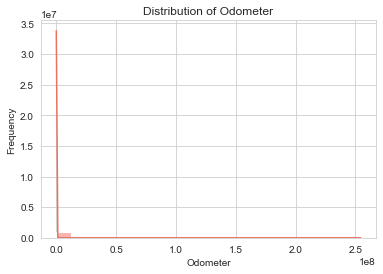

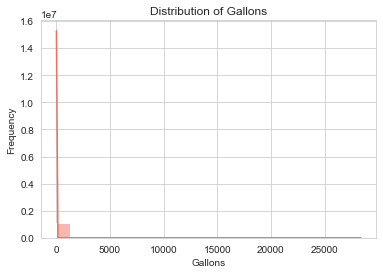

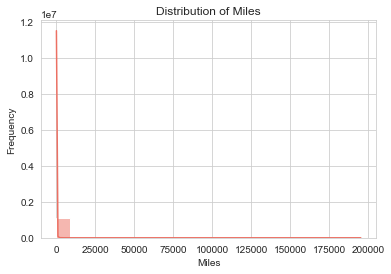

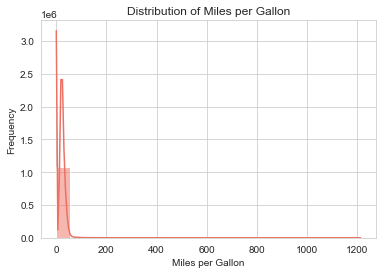

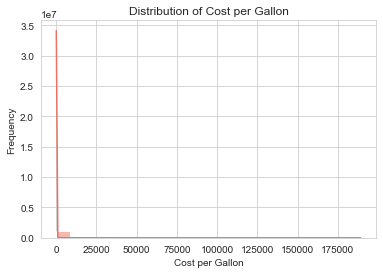

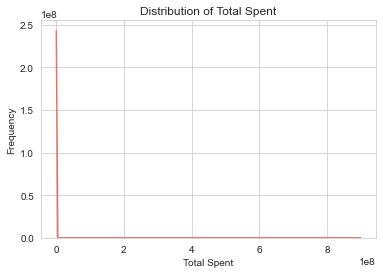

<Figure size 432x288 with 0 Axes>

In [11]:
import os

output_folder = './Plots/Plots[1.2-4]'

# Define the columns to plot along with their labels
columns = {
    'odometer': 'Odometer',
    'gallons': 'Gallons',
    'miles': 'Miles',
    'mpg': 'Miles per Gallon',
    'cost_per_gallon_float': 'Cost per Gallon',
    'total_spent_float': 'Total Spent'
}

# Loop through each column and generate the plots
for column, label in columns.items():
    sns.set_style('whitegrid')
    sns.histplot(updated_df[column].dropna(),
                 bins='sturges',
                 stat='count',
                 kde=True,
                 color='#ec7063')
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')

    plot_path = os.path.join(output_folder, f'{label.lower().replace(" ", "_")}_distribution.png')
    plt.savefig(plot_path)

    plt.show()

    plt.clf()

We are unable to make meaningful observations about these plots due to the lack of a clear distributions. This suggests the presence of significant outliers that obscure our data, making it difficult to draw conclusions. Given the diverse range of currencies involved, it was anticipated that interpreting `Total Spent` and `Cost per Gallon` would be challenging. So we are going to use a boxplot to help us see the outliers and where they should be removed.


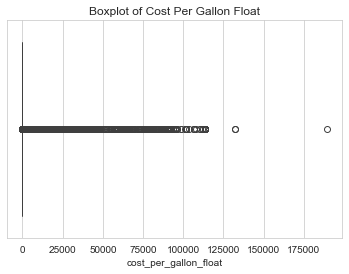

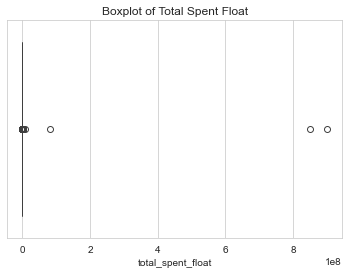

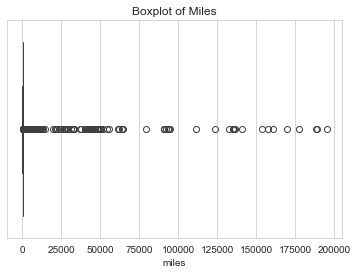

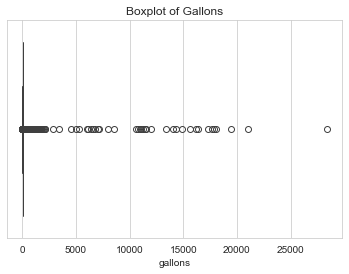

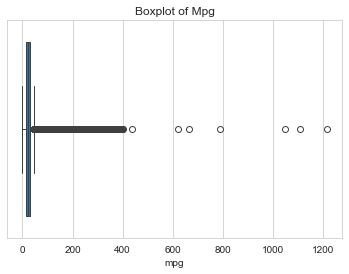

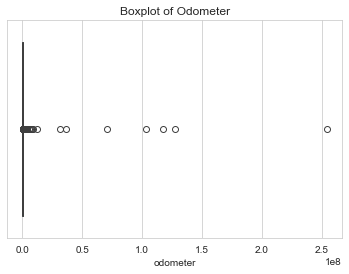

<Figure size 432x288 with 0 Axes>

In [12]:
output_folder = './Plots/Plots[1.2-4]'

# List of columns to plot
columns = ['cost_per_gallon_float', 'total_spent_float', 'miles', 'gallons', 'mpg', 'odometer']

# Loop through each column and generate a boxplot
for column in columns:
    sns.boxplot(x=updated_df[column])
    plt.title(f'Boxplot of {column.replace("_", " ").title()}')

    # Save the plot
    plot_path = os.path.join(output_folder, f'{column}_boxplot.png')
    plt.savefig(plot_path)

    plt.show()
    
    plt.clf()

After examining the boxplots, it is evident that there are significant outliers present in the data. These outliers skew the distributions, making it challenging to draw accurate and informed conclusions. Therefore, we filter out these extreme values using percentiles before conducting further analysis.

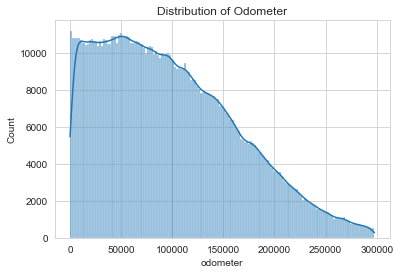

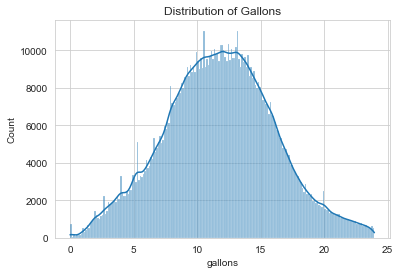

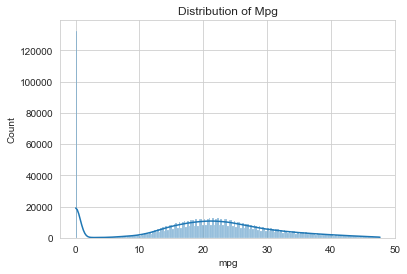

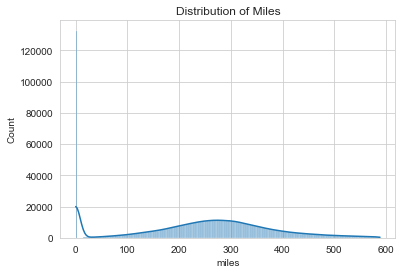

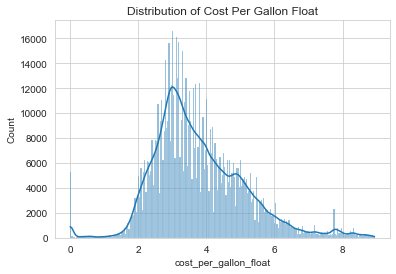

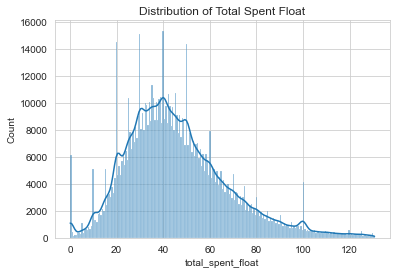

<Figure size 432x288 with 0 Axes>

In [13]:
output_folder = './Plots/Plots[1.2-4]'

numerical_na_removal_df = updated_df.dropna(subset=['odometer', 'gallons', 'mpg', 'miles', 'cost_per_gallon_float', 'total_spent_float'])

def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_clean[(df_clean[column] >= (Q1 - 1.5 * IQR)) & (df_clean[column] <= (Q3 + 1.5 * IQR))]

# List of columns to clean and plot
columns = ['odometer', 'gallons', 'mpg', 'miles', 'cost_per_gallon_float', 'total_spent_float']

# Clean each column and create a single DataFrame
cleaned_dfs = pd.DataFrame({column: remove_outliers_iqr(numerical_na_removal_df, column)[column] for column in columns})

# Function to plot and save the distribution
def plot_and_save_distribution(column, df_clean):
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Distribution of {column.replace("_", " ").title()}')

    plot_path = os.path.join(output_folder, f'{column}_cleaned_distribution.png')
    plt.savefig(plot_path)

    plt.show()
    plt.clf()

# Loop through each column and plot the cleaned data
for column in columns:
    plot_and_save_distribution(column, cleaned_dfs)

[1.2] Numeric Fields: 5. Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense?

In [14]:
print(f'Summary statistics for data without outlier removal:')
pd.set_option('display.float_format', '{:.3f}'.format)
display(updated_df.describe())

print(f'Summary statistics for data with outlier removal:')
pd.set_option('display.float_format', '{:.3f}'.format)
display(cleaned_dfs.describe())

Summary statistics for data without outlier removal:


,odometer,gallons,mpg,miles,cost_per_gallon_float,total_spent_float
count,1024019.000,1098148.000,1098148.000,1098148.000,1089595.000,1096071.000
mean,104001.563,12.798,22.159,269.432,107.893,2751.330
std,340794.415,74.550,15.744,726.394,1682.881,1184991.295
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,45926.000,8.988,15.500,181.338,2.999,32.480
50%,91882.000,11.953,21.800,267.019,3.859,47.010
75%,146925.000,14.937,28.500,342.741,5.310,70.810
max,254362100.000,28380.000,1214.300,195321.200,189270.590,899647469.000


Summary statistics for data with outlier removal:


,odometer,gallons,mpg,miles,cost_per_gallon_float,total_spent_float
count,932496.000,919955.000,922576.000,924051.000,801898.000,807771.000
mean,98608.281,11.805,20.314,244.014,3.773,45.978
std,66345.356,4.334,11.313,138.315,1.331,22.076
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,44288.000,8.881,14.700,169.201,2.879,30.400
50%,89440.000,11.813,21.100,259.770,3.519,42.700
75%,143385.250,14.683,27.400,332.572,4.540,57.940
max,297731.000,23.961,47.700,588.588,8.940,130.700


The summary statistics of the dataset reveal several significant data quality issues, making it challenging to draw accurate conclusions. Most notably, the presence of extremely high standard deviations and unrealistic maximum values across multiple columns suggests the presence of severe outliers and possible data entry errors. For instance, the `odometer` reading has a maximum value of 254 million miles, which is highly implausible, while the `gallons`, `mpg`, `miles`, `cost per gallon`, and `total spent` columns also exhibit similarly exaggerated maximum values. Additionally, minimum values of zero in several columns may indicate missing or misentered data. The monetary columns (such as `cost per gallon` and `total spent`) are particularly difficult to analyze due to the presence of over 100 different currencies in the dataset, which likely contributes to the extreme variability observed.

### Question 2: Feature Engineering

[2.1] 1. Create a new column with the currency.

In [17]:
# Define a regular expression pattern to match all characters until the first digit
currency_pattern = r'^([^\d]+)'

# Extract the currency symbols/abbreviations from the cost_per_gallon column
updated_df['currency'] = updated_df['cost_per_gallon'].str.extract(currency_pattern, expand=False).str.strip()

display(updated_df['currency'].value_counts())
display(updated_df[['currency']])

$      738408
£       86154
€       58443
CA$     46249
R       36043
        ...  
CV$        11
KGS         9
L$          9
IQD         8
YR          4
Name: currency, Length: 121, dtype: int64

,currency
0,NaN
1,$
2,£
3,£
4,$
...,...
1174865,$
1174866,$
1174867,$
1174868,$


[2.1] 2. Create a new column containing the float value of the total spend and the cost per gallon.

In [18]:
# Calculate the total spend by multiplying the cost per gallon by the number of gallons
# updated_df['total_spend'] = updated_df['cost_per_gallon_float'] * updated_df['gallons']

# display(updated_df)

[2.1] 3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID).

In [22]:
def extract_car_details(url):
    # Remove 'https://www.somewebsite.com/' and split by '/'
    parts = url.replace('https://www.somewebsite.com/', '').split('/')
    
    if len(parts) == 4:
        # standard case
        make = parts[0]
        model = parts[1]
        year = parts[2]
        user_id = parts[3]
    elif len(parts) == 3:
        
        if parts[1].isdigit():
            if int(parts[1]) > 1900:
                year = parts[1]
                make = "incorrect_make"
                model = "not applicable"
            else:
                make = parts[0]
                model = parts[1]
                year = "0"
        else:
            make = parts[0]
            model = parts[1]
            year = "0" 
        
        # handle mispelled ones with out a model
        # make = parts[0]
        # can potentially be:
        # make = "incorrect_make"
        # or
        # make = "other"
        #model = "not applicable"
        #year = parts[1]
        user_id = parts[2]
    elif len(parts) == 5:
        # handle ones that have extra "other" part 
        # ignore first other part
        make = parts[1]
        model = parts[2]
        year = parts[3]
        user_id = parts[4]

    return pd.Series([make, model, year, user_id])

# Apply the function to extract details and add new columns to the DataFrame
updated_df[['make', 'model', 'year', 'user_id']] = updated_df['user_url'].apply(extract_car_details)
display(updated_df[['make', 'model', 'year', 'user_id']])

,make,model,year,user_id
0,suzuki,swift,2015,674857
1,bmw,x3,2009,461150
2,mercedes-benz,e300,1998,133501
3,bmw,320d,2010,247233
4,honda,passport,2019,1038865
...,...,...,...,...
1174865,volkswagen,beetle,2005,388391
1174866,toyota,avalon,2000,432408
1174867,fiat,500,2013,909694
1174868,mini,cooper,2019,952426


[2.2] 1. litres filled: use the gallons - consider whether to use UK or US gallons.
* Objective: The objective of this code section is to determine the predominant currency type in the dataset and use it to convert fuel quantities from gallons to liters.

* Steps:
    1. Determine Currency Type:
        * A function `determine_currency_type` is defined to classify the currency into `US`, `UK`, or `Other` based on the currency symbol.
        * This function is applied to the currency column of the DataFrame `updated_df` to create a new column `currency_type`.
    2. Count Currency Occurrences:
        * The occurrences of each currency type are counted using the `value_counts` method on the `currency_type` column.
    3. Identify Predominant Currency:
        * The predominant currency is determined by comparing the counts of `US` and `UK` currencies. If `US` has more occurrences, it is set as the predominant currency; otherwise, `UK` is chosen.
    4. Set Conversion Factor:
        * Based on the predominant currency, a conversion factor is set:
            - For `US`, the conversion factor is 3.78541 (US gallons to liters).
            - For `UK`, the conversion factor is 4.54609 (UK gallons to liters).
    5. Convert Gallons to Liters:
        * A function `convert_gallons_to_litres` is defined to convert gallons to liters using the determined conversion factor.
        * This function is applied to the `gallons` column to create a new column `litres_filled`.

In [23]:
# Function to determine the currency type
def determine_currency_type(currency):
    if '$' == currency:
        return 'US'
    elif '£' == currency:
        return 'UK'
    else:
        return 'Other'
    
# Apply the function to determine currency type
updated_df['currency_type'] = updated_df['currency'].apply(determine_currency_type)

# Count the occurrences of each currency type
currency_counts = updated_df['currency_type'].value_counts()

# Determine the predominant currency
predominant_currency = 'US' if currency_counts.get('US', 0) > currency_counts.get('UK', 0) else 'UK'

# Conversion factor based on the predominant currency
if predominant_currency == 'US':
    conversion_factor = 3.78541  # US gallon to liters
    print(f'Using US gallon to litre conversion factor: {conversion_factor}')
else:
    conversion_factor = 4.54609  # UK gallon to liters
    print(f'Using UK gallon to litre conversion factor: {conversion_factor}')

# Function to convert gallons to liters
def convert_gallons_to_litres(gallons):
    if pd.isna(gallons):
        return None
    return gallons * conversion_factor

# Apply the conversion to create a new 'liters_filled' column
updated_df['litres_filled'] = updated_df['gallons'].apply(convert_gallons_to_litres)

display(updated_df[['currency_type', 'litres_filled']])

Using US gallon to litre conversion factor: 3.78541


,currency_type,litres_filled
0,Other,NaN
1,US,45.879
2,UK,30.249
3,UK,40.031
4,US,44.104
...,...,...
1174865,US,49.384
1174866,US,47.836
1174867,US,37.862
1174868,US,39.720


[2.2] 2. km driven: use the miles driven to compute this.

In [24]:
# Function to convert miles to kilometers
def miles_to_km(miles):
    if pd.isna(miles):
        return None
    return miles * 1.60934  # Convert miles to kilometers

# Apply the function to create a new 'km_driven' column
updated_df['km_driven'] = updated_df['miles'].apply(miles_to_km)

display(updated_df[['miles', 'km_driven']])

,miles,km_driven
0,NaN,NaN
1,382.992,616.364
2,227.743,366.517
3,494.910,796.478
4,244.400,393.323
...,...,...
1174865,335.282,539.583
1174866,252.740,406.745
1174867,285.057,458.754
1174868,382.995,616.368


[2.2] 3. litres per 100km: use the two new features to calculate this.

In [25]:
# Function to calculate liters per 100 kilometers
def calculate_litres_per_100km(liters, km):
    if pd.isna(liters) or pd.isna(km) or km == 0:
        return None
    return (liters / km) * 100

# Apply the function to create a new 'liters_per_100km' column
updated_df['litres_per_100km'] = updated_df.apply(lambda row: calculate_litres_per_100km(row['litres_filled'], row['km_driven']), axis=1)

display(updated_df[['litres_filled', 'km_driven', 'litres_per_100km']])

,litres_filled,km_driven,litres_per_100km
0,NaN,NaN,NaN
1,45.879,616.364,7.444
2,30.249,366.517,8.253
3,40.031,796.478,5.026
4,44.104,393.323,11.213
...,...,...,...
1174865,49.384,539.583,9.152
1174866,47.836,406.745,11.761
1174867,37.862,458.754,8.253
1174868,39.720,616.368,6.444


### Question 3: Vehicle Exploration

[3.1] Plot the number of unique users per country (remember, we proxy this by
currency).

C:\Users\nihal\AppData\Local\Temp\ipykernel_31808\1946635800.py:21: UserWarning: Glyph 3647 (\N{THAI CURRENCY SYMBOL BAHT}) missing from current font.
  plt.savefig(plot_path)
C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3647 (\N{THAI CURRENCY SYMBOL BAHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


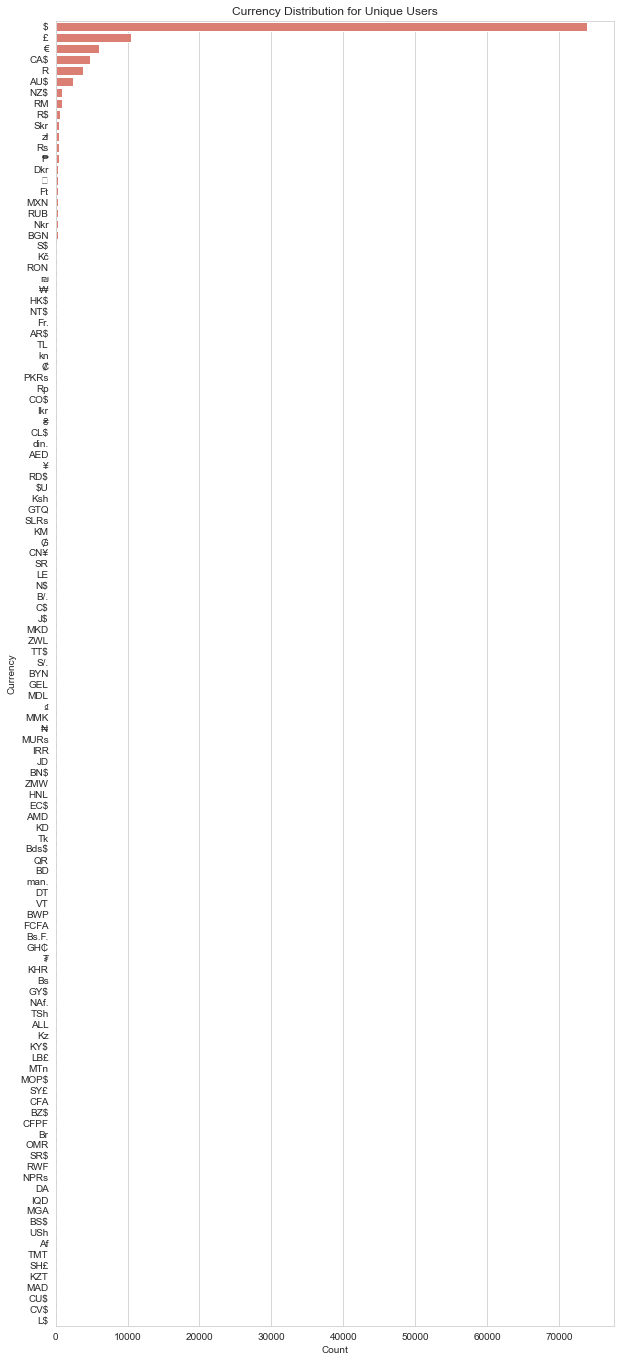

In [26]:
output_folder = './Plots/Plots[3.1-1]'

# Create a DataFrame with unique users
unique_users_df = updated_df.drop_duplicates(subset='user_url')

# Plot the currency value counts as a barplot
plt.figure(figsize=(10, 24))
sns.barplot(
    x=unique_users_df['currency'].value_counts().values, 
    y=unique_users_df['currency'].value_counts().index, 
    orient='h', 
    color='#ec7063'
)

# Set plot title and labels
plt.title('Currency Distribution for Unique Users')
plt.xlabel('Count')
plt.ylabel('Currency')

plot_path = os.path.join(output_folder, 'currency_distribution.png')
plt.savefig(plot_path)

plt.show()

[3.2] Look at the popularity of the app: plot the number of unique users per
day.

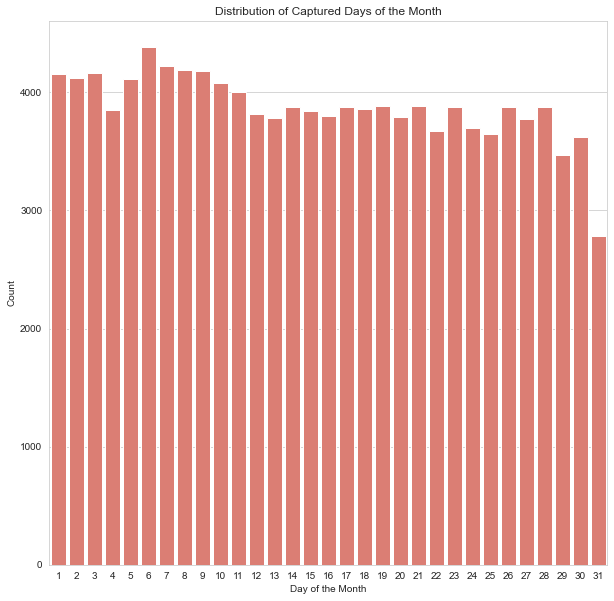

In [27]:
output_folder = './Plots/Plots[3.2]'

# Extract the day of the month
series_captured_day_of_month = unique_users_df['date_captured'].dt.day
df_capture_day_of_month = unique_users_df.copy()
df_capture_day_of_month['captured_day_of_month'] = series_captured_day_of_month

# Plot the day of the month distribution
plt.figure(figsize=(10, 10))
sns.barplot(
    x=df_capture_day_of_month['captured_day_of_month'].value_counts().index,
    y=df_capture_day_of_month['captured_day_of_month'].value_counts().values,
    orient='v',  # Use 'v' for vertical orientation
    color='#ec7063'
)

plt.title('Distribution of Captured Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

plot_path = os.path.join(output_folder, 'captured_day_of_month_distribution.png')
plt.savefig(plot_path)

plt.show()

The app is most popular during the beginning of the month, specifically with in the first 10 days of the month.

[3.3] Look at the distribution of age of the vehicles per country - look at the
year of the vehicle. Remember to look at the date it was refuelled, not
the current date.

C:\Users\nihal\AppData\Local\Temp\ipykernel_31808\2654893908.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_users_df["car_age"] = unique_users_df.apply(calculate_vehicle_age, axis=1)


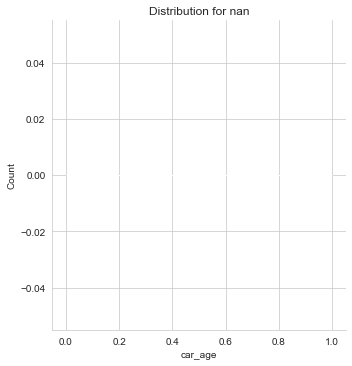

<Figure size 432x288 with 0 Axes>

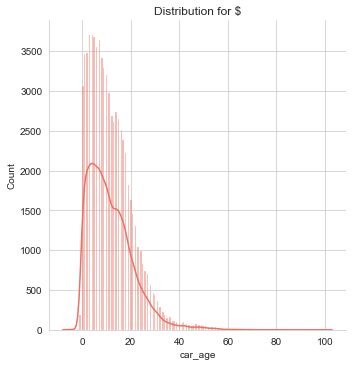

<Figure size 432x288 with 0 Axes>

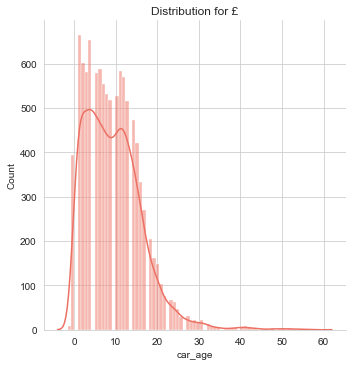

<Figure size 432x288 with 0 Axes>

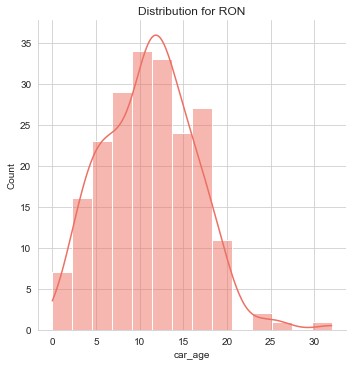

<Figure size 432x288 with 0 Axes>

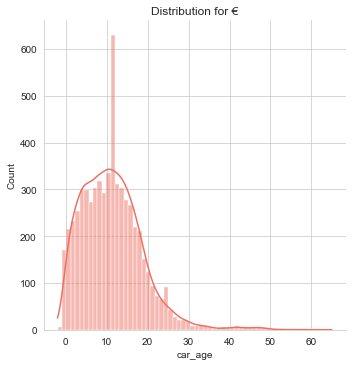

<Figure size 432x288 with 0 Axes>

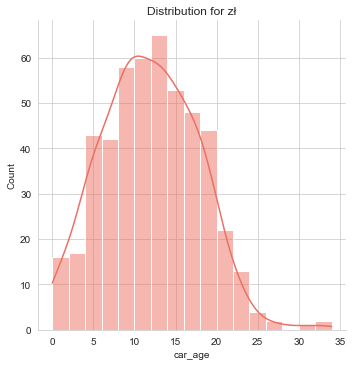

<Figure size 432x288 with 0 Axes>

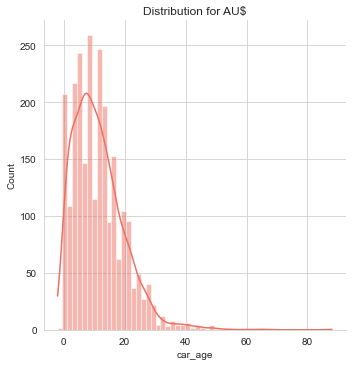

<Figure size 432x288 with 0 Axes>

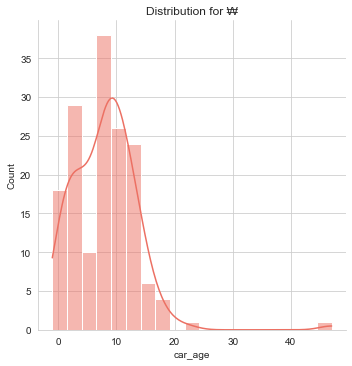

<Figure size 432x288 with 0 Axes>

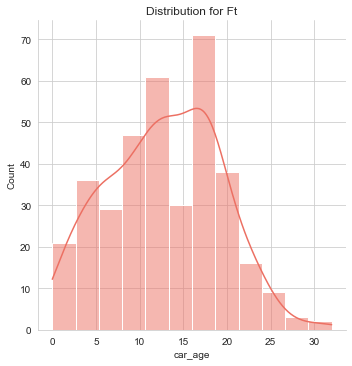

<Figure size 432x288 with 0 Axes>

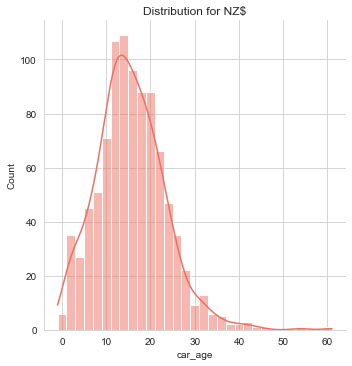

<Figure size 432x288 with 0 Axes>

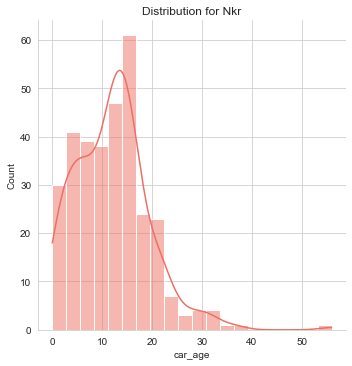

<Figure size 432x288 with 0 Axes>

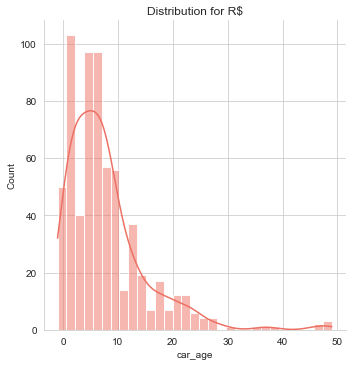

<Figure size 432x288 with 0 Axes>

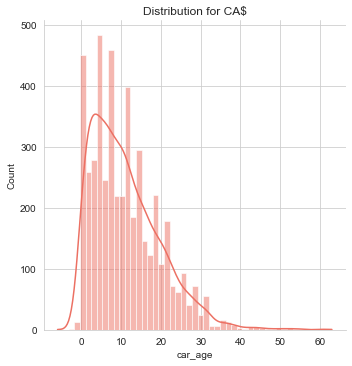

<Figure size 432x288 with 0 Axes>

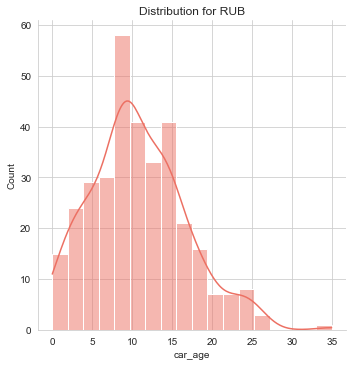

<Figure size 432x288 with 0 Axes>

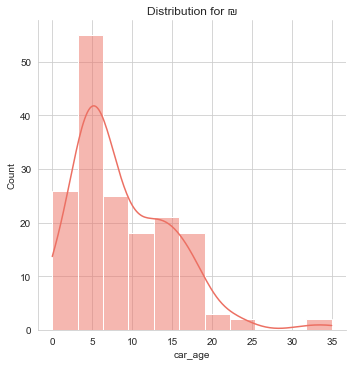

<Figure size 432x288 with 0 Axes>

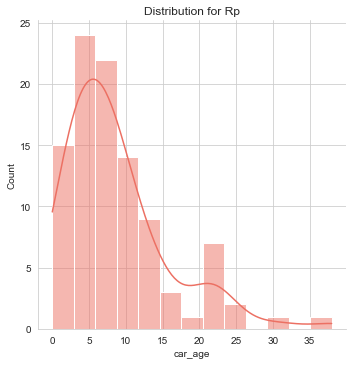

<Figure size 432x288 with 0 Axes>

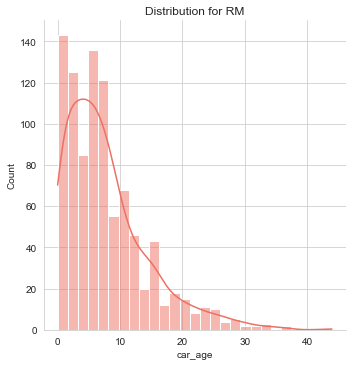

<Figure size 432x288 with 0 Axes>

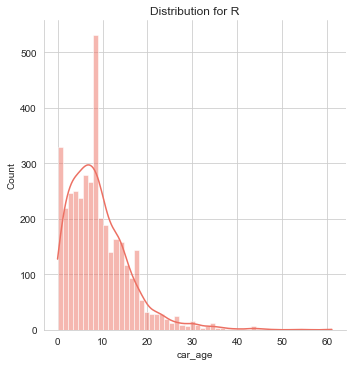

<Figure size 432x288 with 0 Axes>

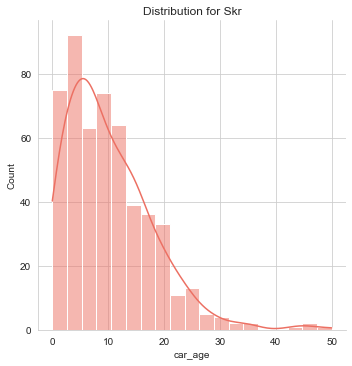

<Figure size 432x288 with 0 Axes>

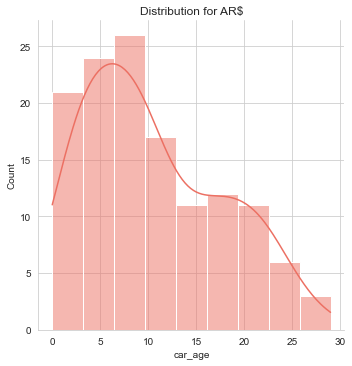

<Figure size 432x288 with 0 Axes>

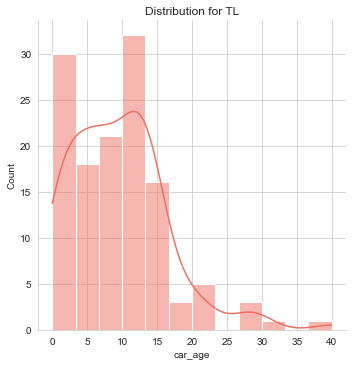

<Figure size 432x288 with 0 Axes>

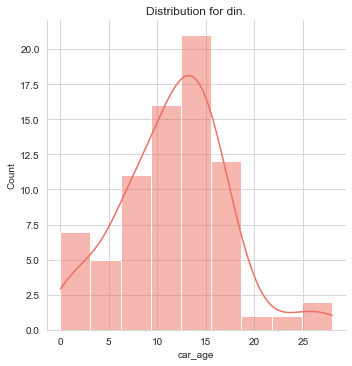

<Figure size 432x288 with 0 Axes>

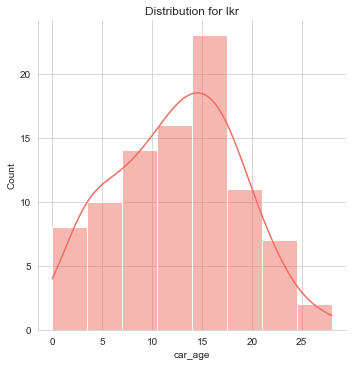

<Figure size 432x288 with 0 Axes>

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3647 (\N{THAI CURRENCY SYMBOL BAHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


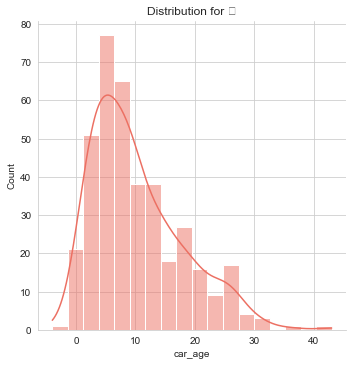

<Figure size 432x288 with 0 Axes>

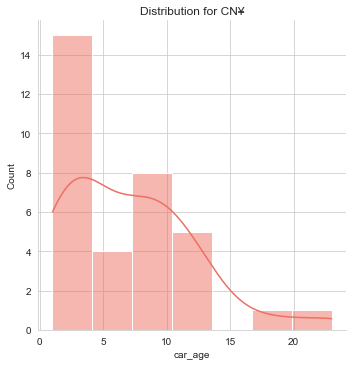

<Figure size 432x288 with 0 Axes>

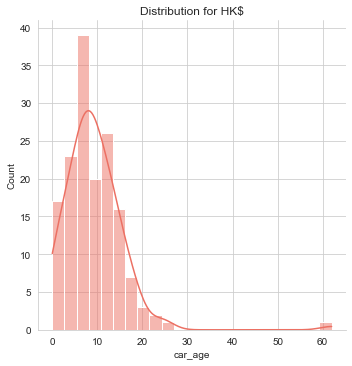

<Figure size 432x288 with 0 Axes>

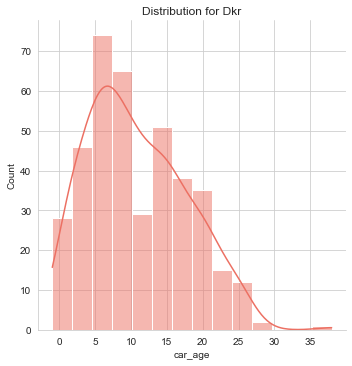

<Figure size 432x288 with 0 Axes>

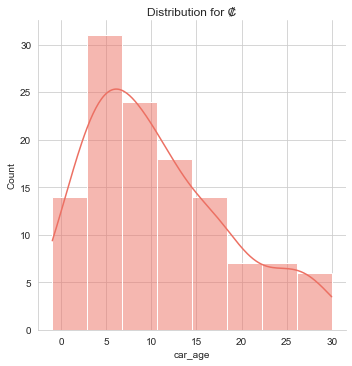

<Figure size 432x288 with 0 Axes>

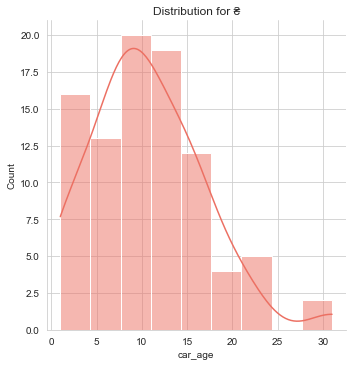

<Figure size 432x288 with 0 Axes>

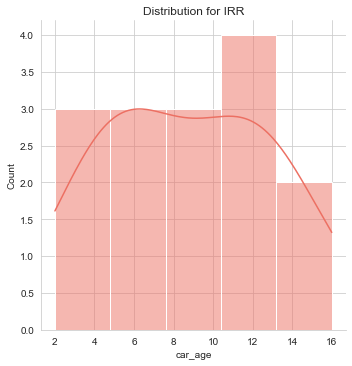

<Figure size 432x288 with 0 Axes>

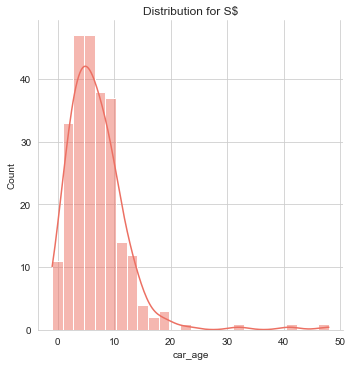

<Figure size 432x288 with 0 Axes>

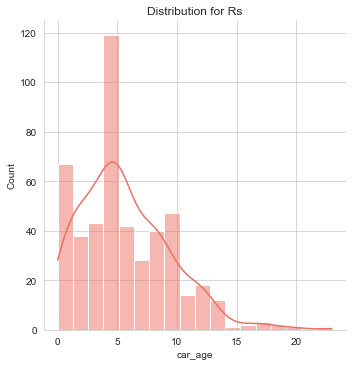

<Figure size 432x288 with 0 Axes>

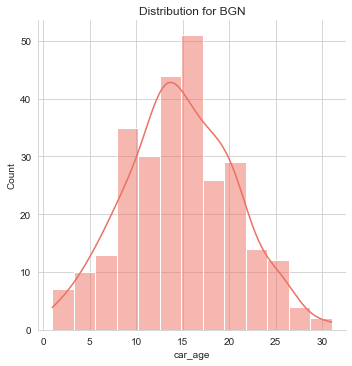

<Figure size 432x288 with 0 Axes>

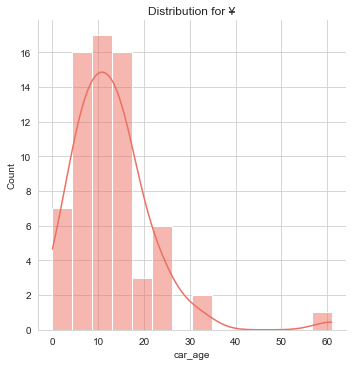

<Figure size 432x288 with 0 Axes>

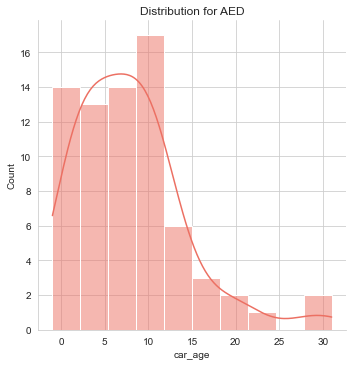

<Figure size 432x288 with 0 Axes>

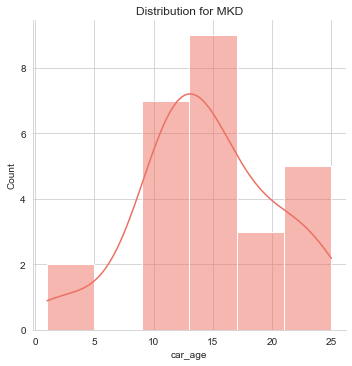

<Figure size 432x288 with 0 Axes>

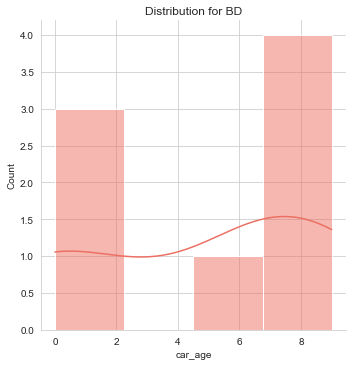

<Figure size 432x288 with 0 Axes>

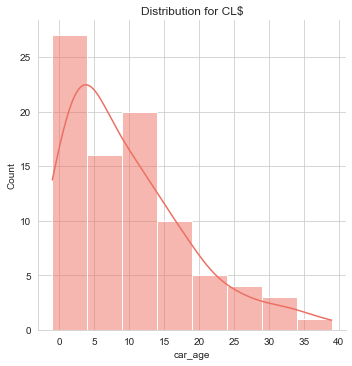

<Figure size 432x288 with 0 Axes>

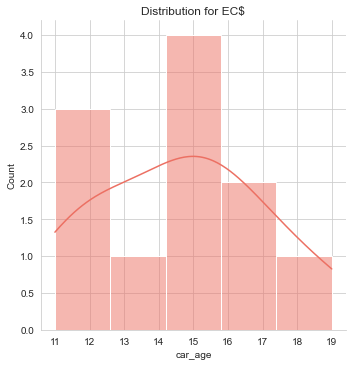

<Figure size 432x288 with 0 Axes>

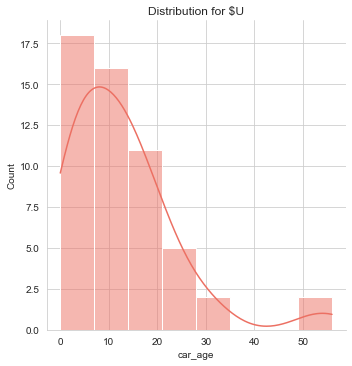

<Figure size 432x288 with 0 Axes>

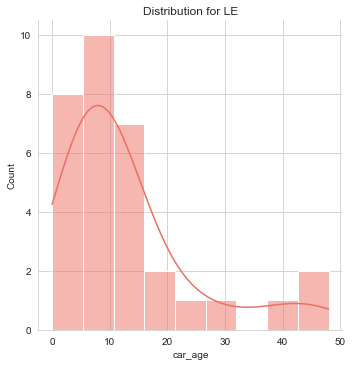

<Figure size 432x288 with 0 Axes>

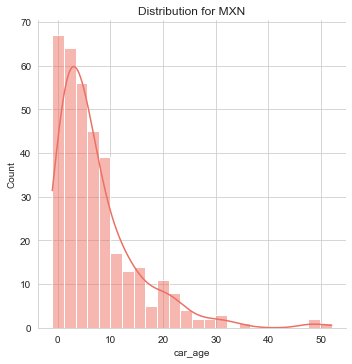

<Figure size 432x288 with 0 Axes>

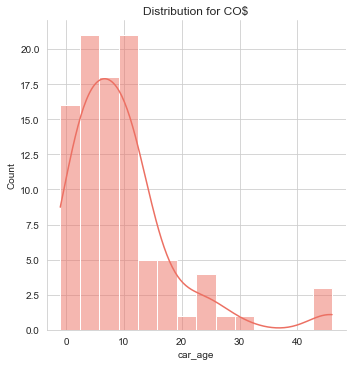

<Figure size 432x288 with 0 Axes>

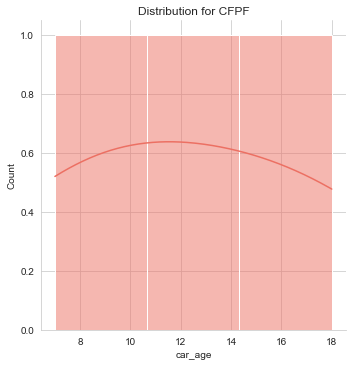

<Figure size 432x288 with 0 Axes>

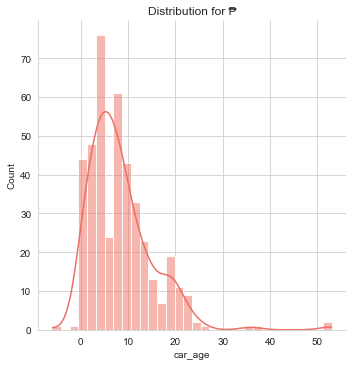

<Figure size 432x288 with 0 Axes>

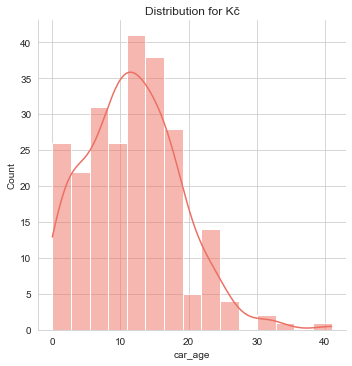

<Figure size 432x288 with 0 Axes>

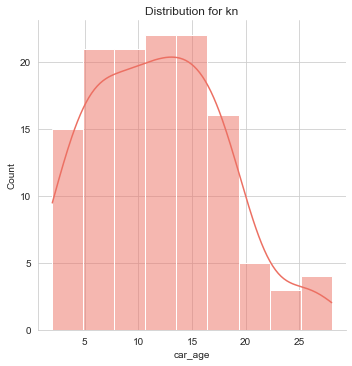

<Figure size 432x288 with 0 Axes>

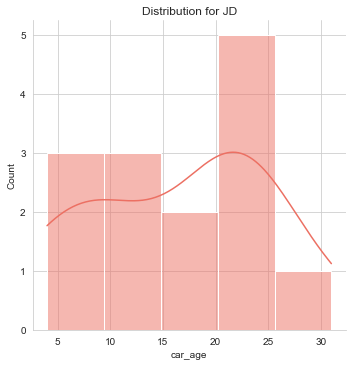

<Figure size 432x288 with 0 Axes>

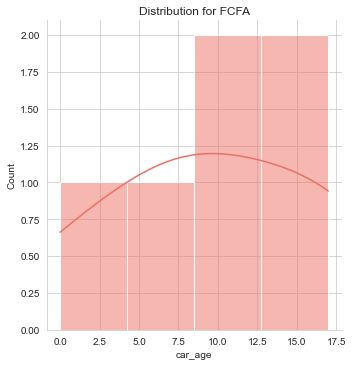

<Figure size 432x288 with 0 Axes>

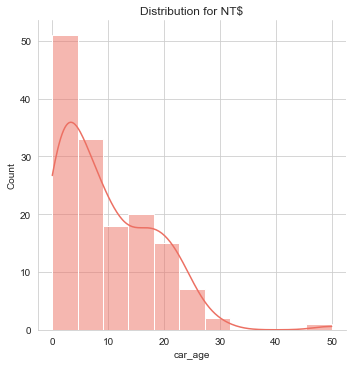

<Figure size 432x288 with 0 Axes>

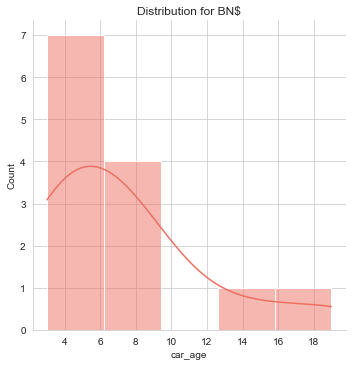

<Figure size 432x288 with 0 Axes>

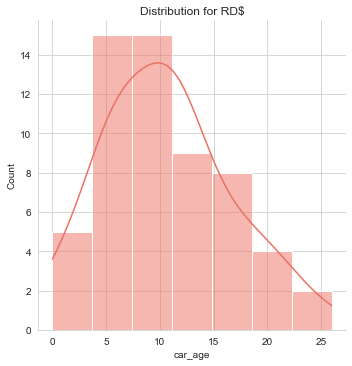

<Figure size 432x288 with 0 Axes>

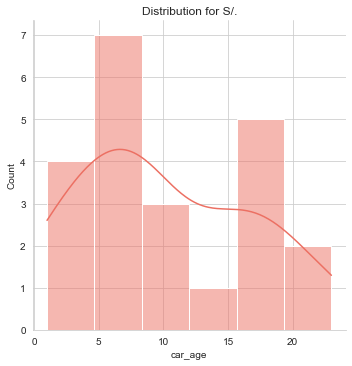

<Figure size 432x288 with 0 Axes>

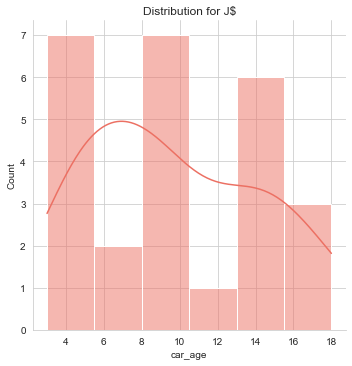

<Figure size 432x288 with 0 Axes>

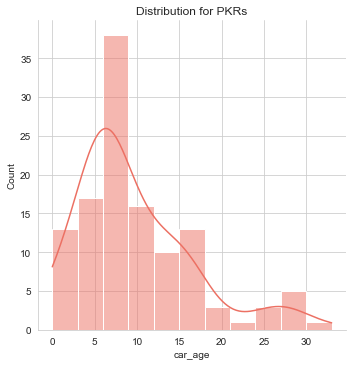

<Figure size 432x288 with 0 Axes>

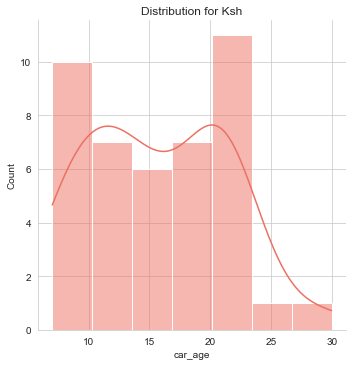

<Figure size 432x288 with 0 Axes>

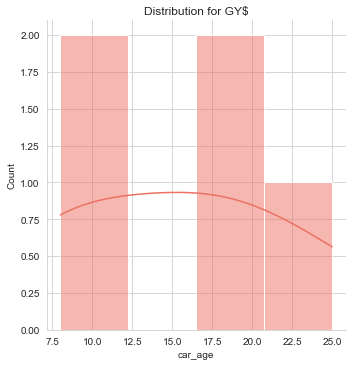

<Figure size 432x288 with 0 Axes>

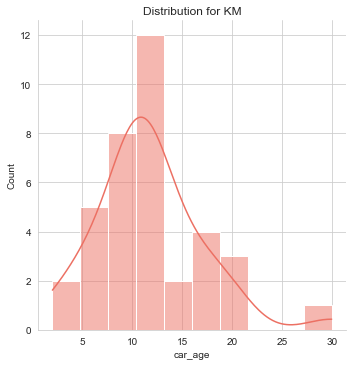

<Figure size 432x288 with 0 Axes>

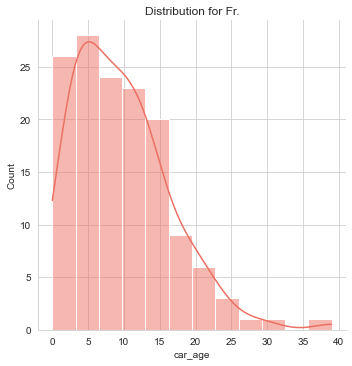

<Figure size 432x288 with 0 Axes>

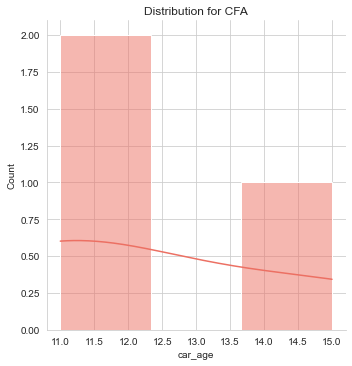

<Figure size 432x288 with 0 Axes>

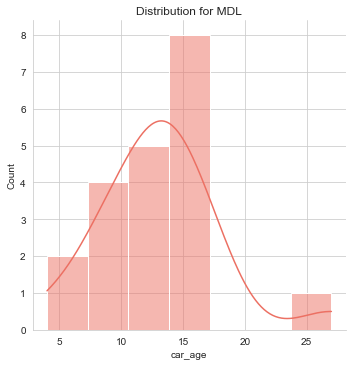

<Figure size 432x288 with 0 Axes>

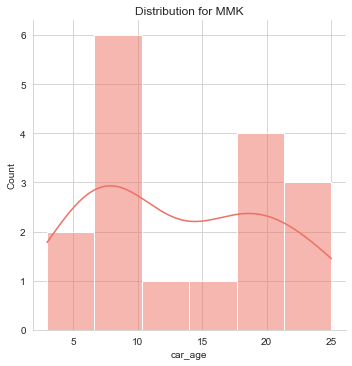

<Figure size 432x288 with 0 Axes>

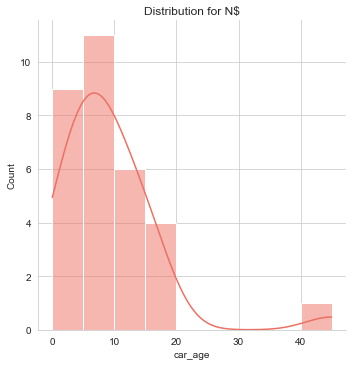

<Figure size 432x288 with 0 Axes>

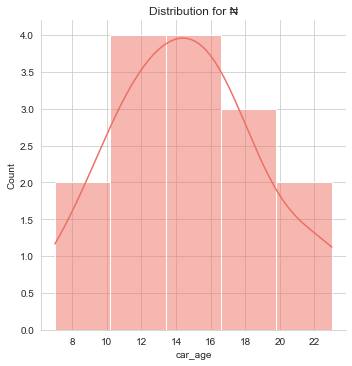

<Figure size 432x288 with 0 Axes>

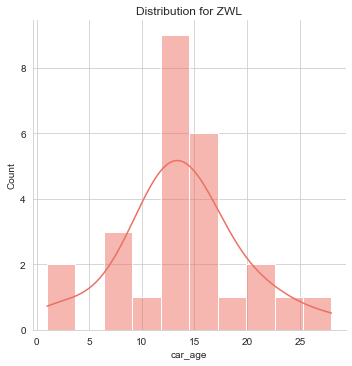

<Figure size 432x288 with 0 Axes>

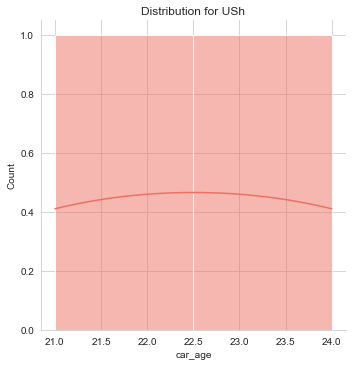

<Figure size 432x288 with 0 Axes>

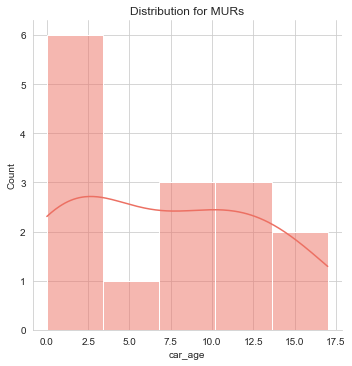

<Figure size 432x288 with 0 Axes>

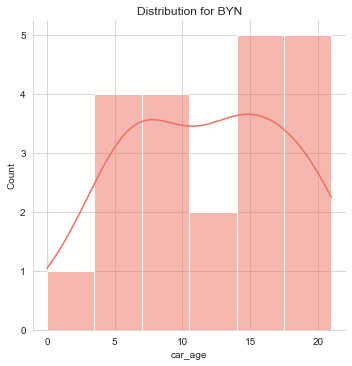

<Figure size 432x288 with 0 Axes>

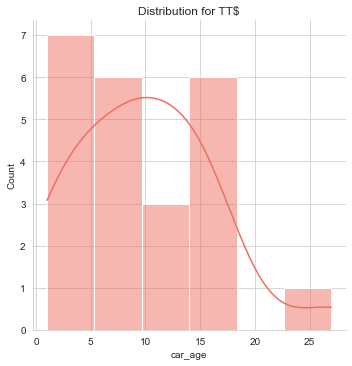

<Figure size 432x288 with 0 Axes>

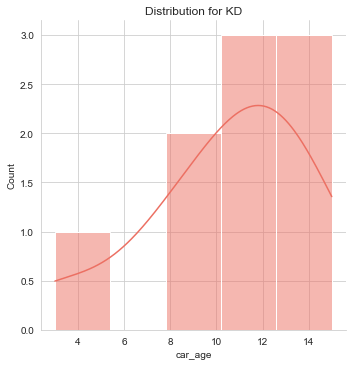

<Figure size 432x288 with 0 Axes>

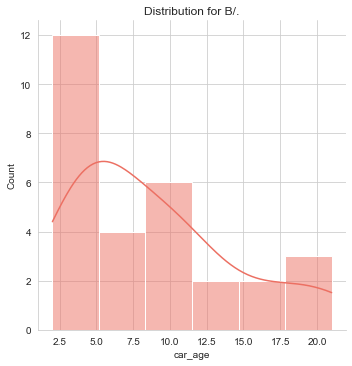

<Figure size 432x288 with 0 Axes>

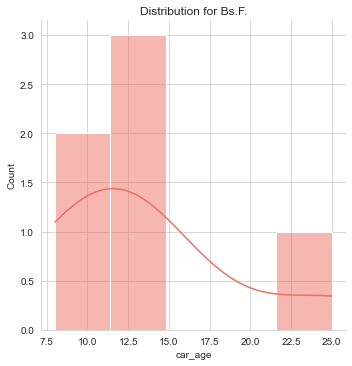

<Figure size 432x288 with 0 Axes>

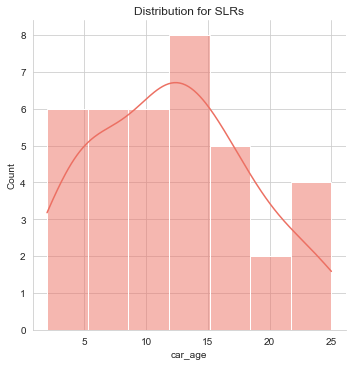

<Figure size 432x288 with 0 Axes>

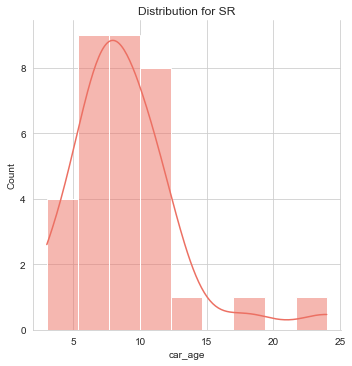

<Figure size 432x288 with 0 Axes>

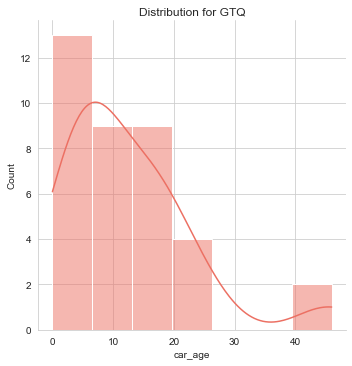

<Figure size 432x288 with 0 Axes>

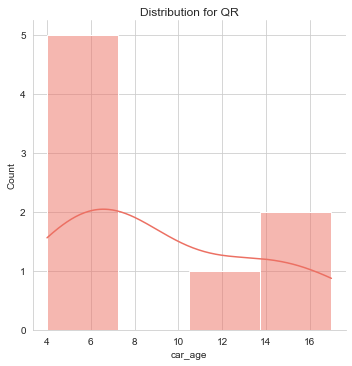

<Figure size 432x288 with 0 Axes>

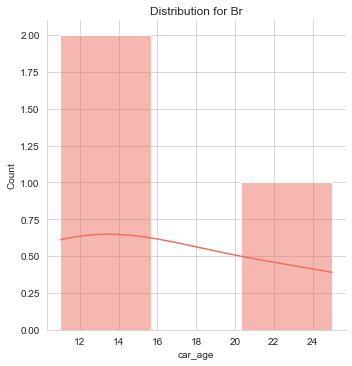

<Figure size 432x288 with 0 Axes>

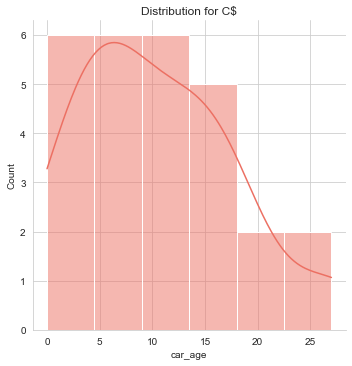

<Figure size 432x288 with 0 Axes>

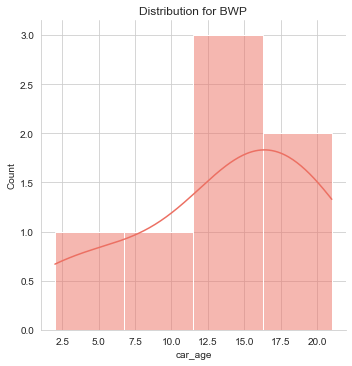

<Figure size 432x288 with 0 Axes>

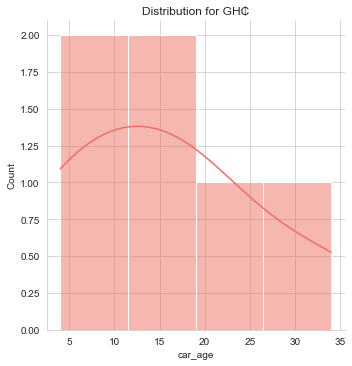

<Figure size 432x288 with 0 Axes>

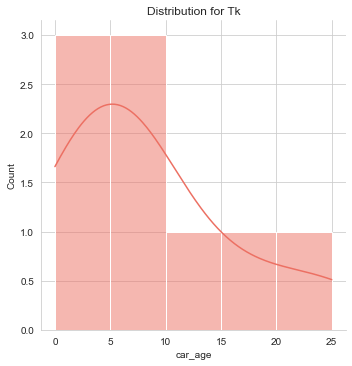

<Figure size 432x288 with 0 Axes>

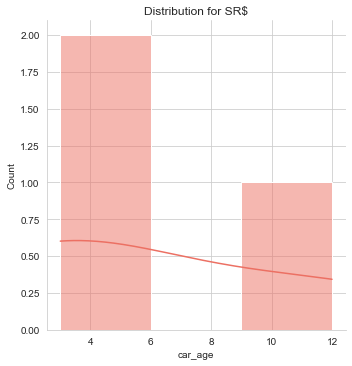

<Figure size 432x288 with 0 Axes>

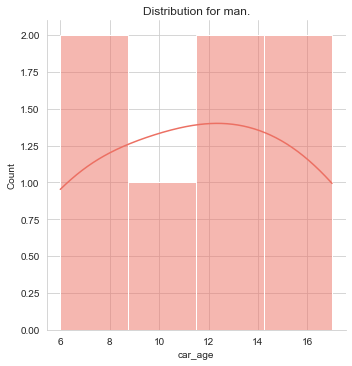

<Figure size 432x288 with 0 Axes>

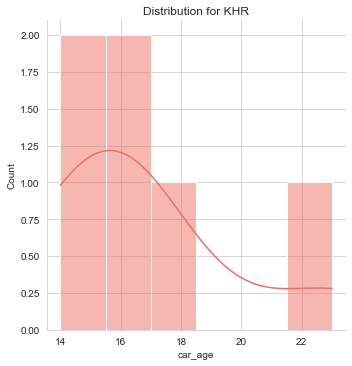

<Figure size 432x288 with 0 Axes>

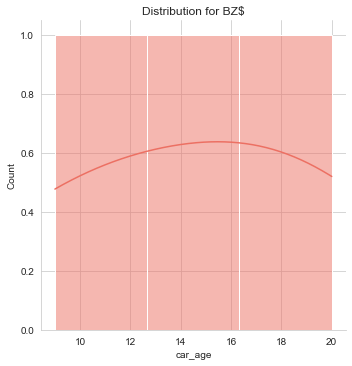

<Figure size 432x288 with 0 Axes>

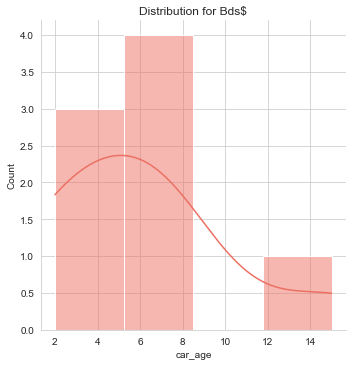

<Figure size 432x288 with 0 Axes>

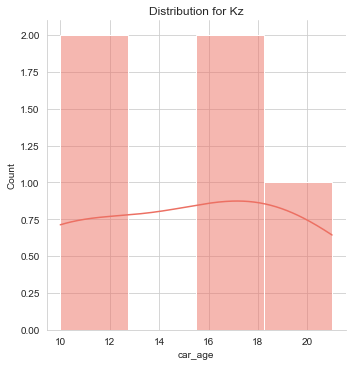

<Figure size 432x288 with 0 Axes>

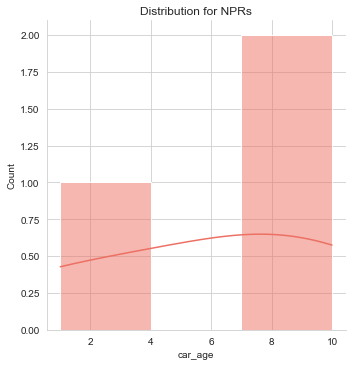

<Figure size 432x288 with 0 Axes>

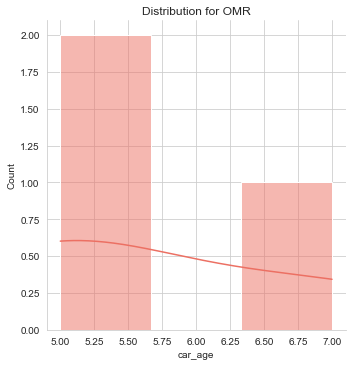

<Figure size 432x288 with 0 Axes>

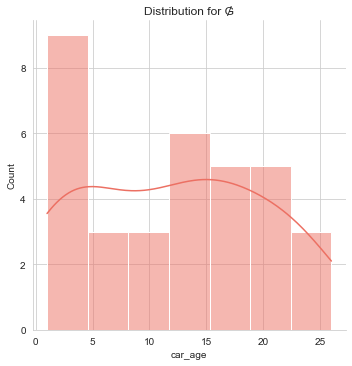

<Figure size 432x288 with 0 Axes>

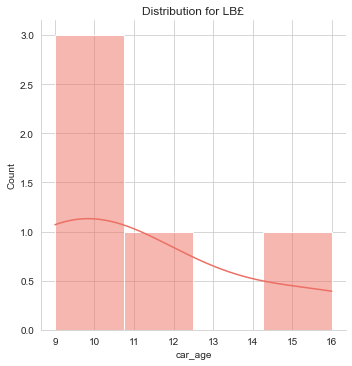

<Figure size 432x288 with 0 Axes>

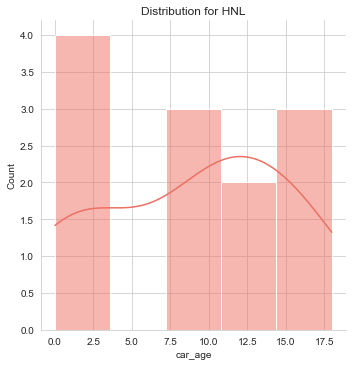

<Figure size 432x288 with 0 Axes>

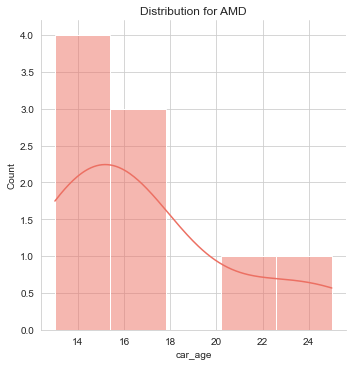

<Figure size 432x288 with 0 Axes>

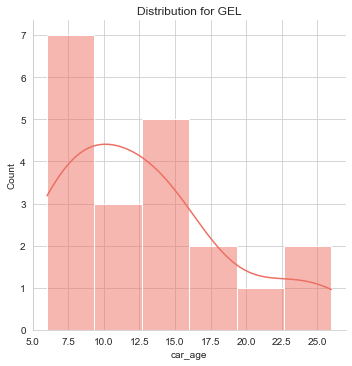

<Figure size 432x288 with 0 Axes>

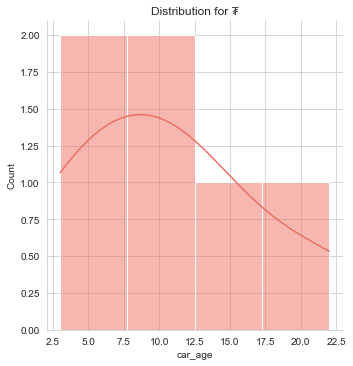

<Figure size 432x288 with 0 Axes>

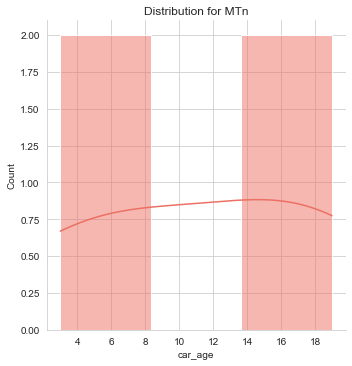

<Figure size 432x288 with 0 Axes>

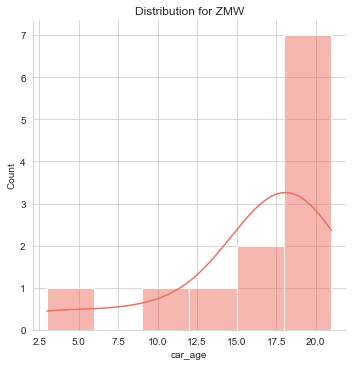

<Figure size 432x288 with 0 Axes>

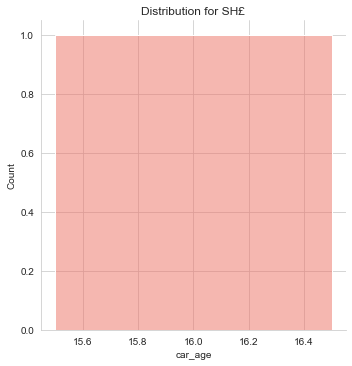

<Figure size 432x288 with 0 Axes>

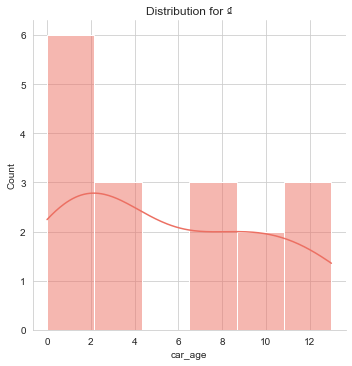

<Figure size 432x288 with 0 Axes>

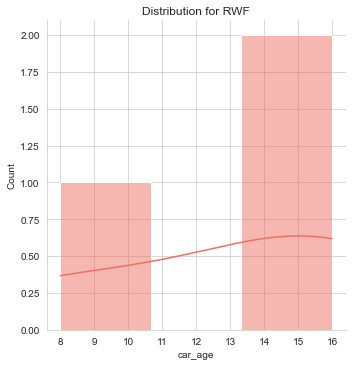

<Figure size 432x288 with 0 Axes>

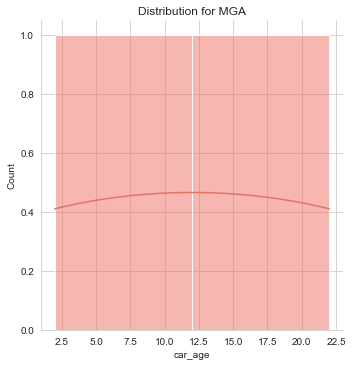

<Figure size 432x288 with 0 Axes>

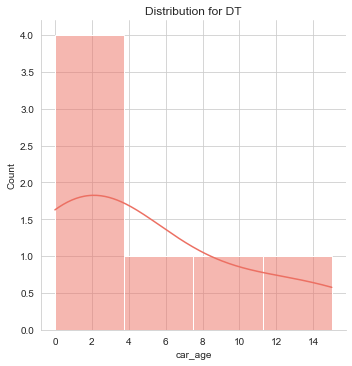

<Figure size 432x288 with 0 Axes>

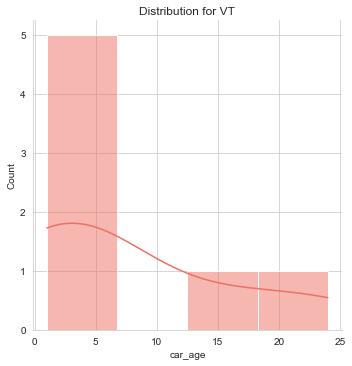

<Figure size 432x288 with 0 Axes>

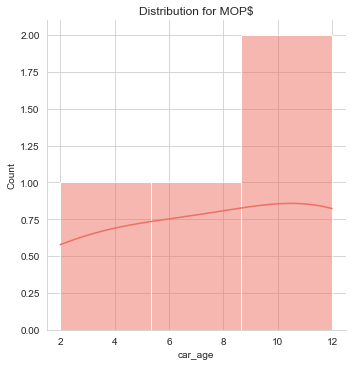

<Figure size 432x288 with 0 Axes>

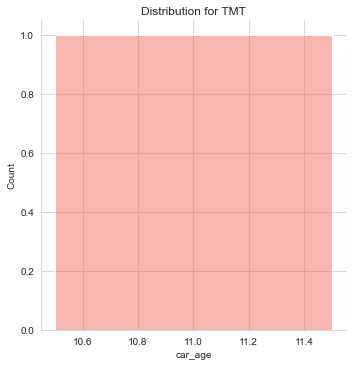

<Figure size 432x288 with 0 Axes>

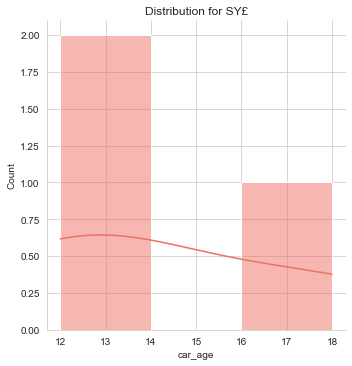

<Figure size 432x288 with 0 Axes>

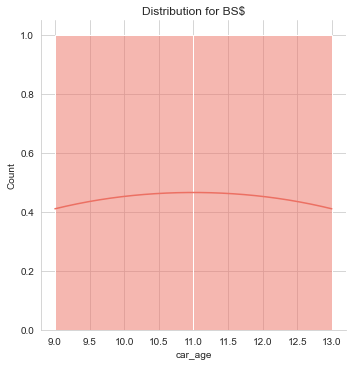

<Figure size 432x288 with 0 Axes>

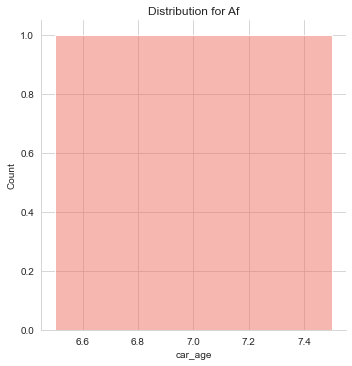

<Figure size 432x288 with 0 Axes>

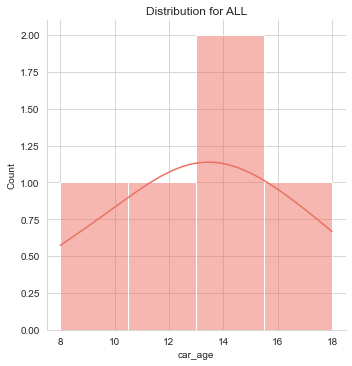

<Figure size 432x288 with 0 Axes>

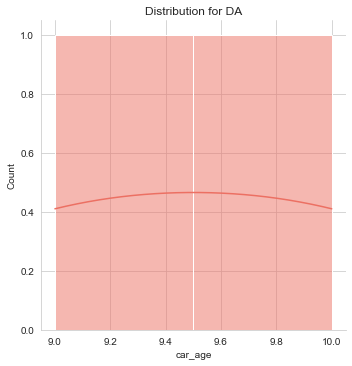

<Figure size 432x288 with 0 Axes>

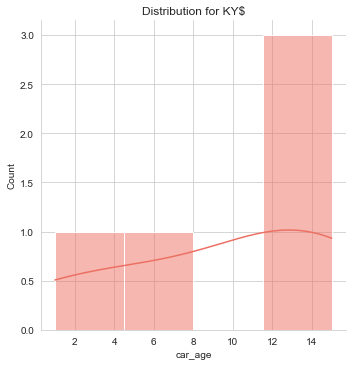

<Figure size 432x288 with 0 Axes>

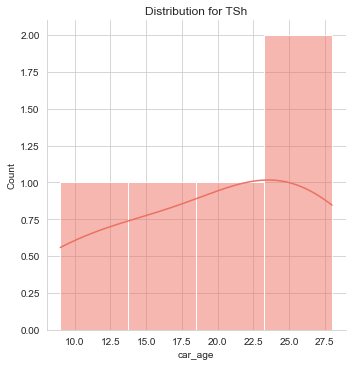

<Figure size 432x288 with 0 Axes>

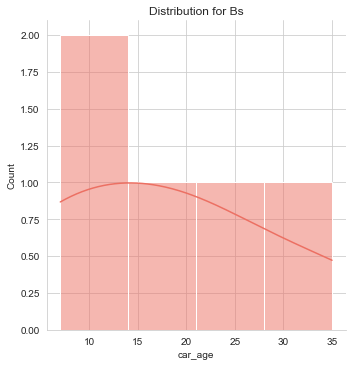

<Figure size 432x288 with 0 Axes>

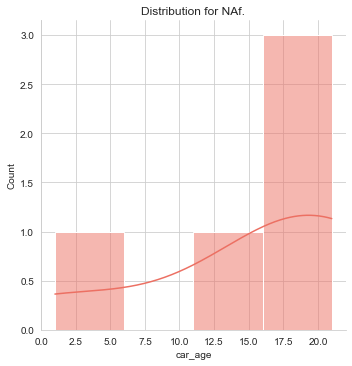

<Figure size 432x288 with 0 Axes>

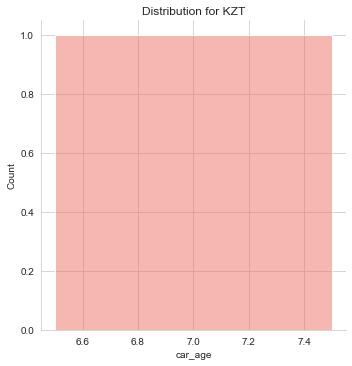

<Figure size 432x288 with 0 Axes>

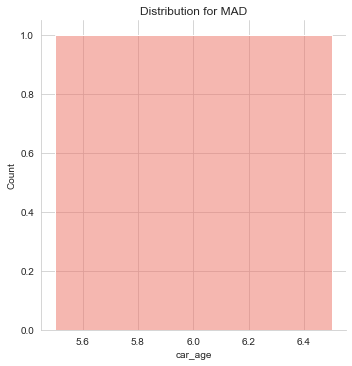

<Figure size 432x288 with 0 Axes>

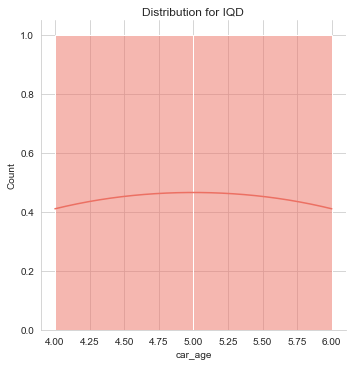

<Figure size 432x288 with 0 Axes>

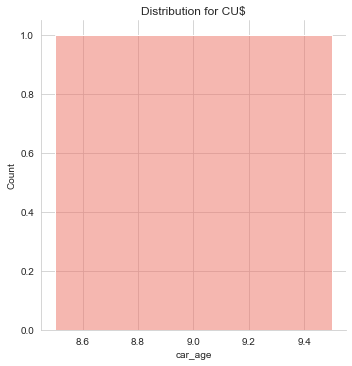

<Figure size 432x288 with 0 Axes>

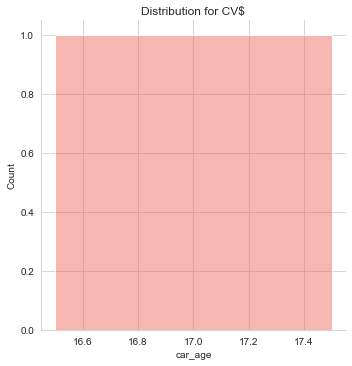

<Figure size 432x288 with 0 Axes>

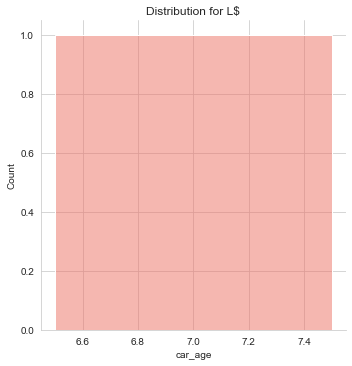

<Figure size 432x288 with 0 Axes>

In [30]:
from numpy import NaN

countries = unique_users_df['currency'].unique()

# date_fueled - year (cars year) for each row in dataframe
def calculate_vehicle_age(row):
    age = 0
    if int(row["year"]) != 0:
        age = row["date_fueled"].year - int(row["year"])
    return age

unique_users_df["car_age"] = unique_users_df.apply(calculate_vehicle_age, axis=1)

for country in countries:
    sns.displot(data=unique_users_df[unique_users_df['currency'] == country], 
                x="car_age", kde=True, height=5, aspect=1, color='#ec7063')
    plt.title(f'Distribution for {country}')
    plt.show() 
    plt.clf() # or plt.savefig(f'{country}_distribution.png') to save the plot


In the more developed countries, such as the United States, Europe, United Kingdom, Australia and New Zealand. The distribution of the age of the cars is generally lower, as they have more cars that are younger. These younger cars have ages that are less than 10 years old. This is also surprisingly true for South Africa as well, even though South Africa is not as developed as the other countries mentioned. Most of the cars for all countries have an age that is less than 20 years old.

[3.4] Which makes and models of vehicles are the most popular?

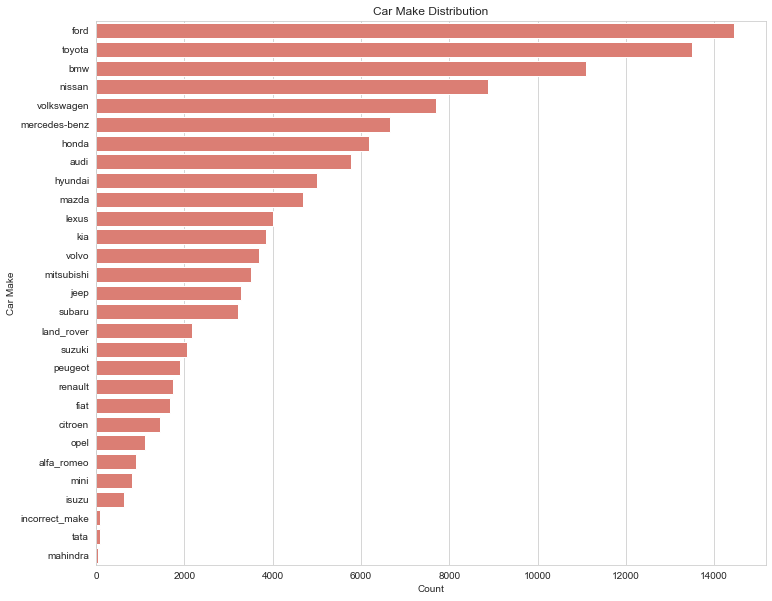

<Figure size 432x288 with 0 Axes>

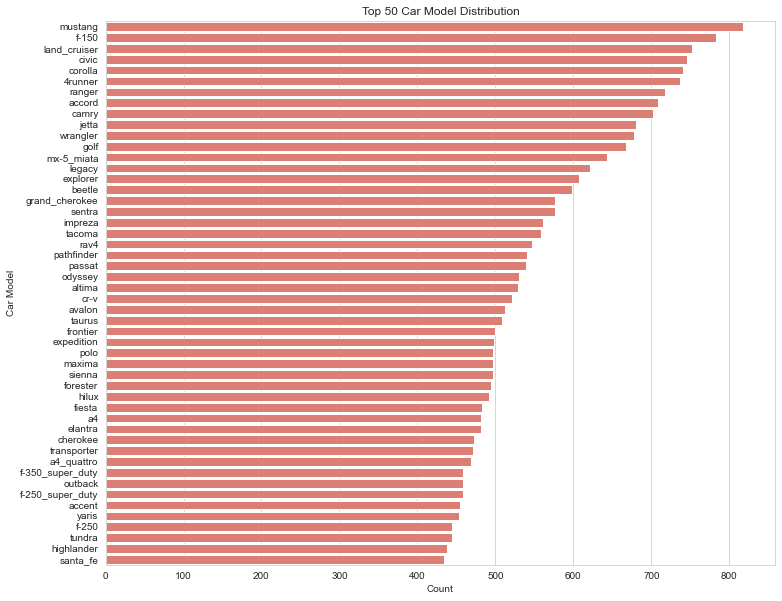

<Figure size 432x288 with 0 Axes>

In [29]:
cars_unique_users_df = unique_users_df.copy()

# Apply the function to extract details and add new columns to the DataFrame
cars_unique_users_df[['make', 'model', 'year', 'user_id']] = cars_unique_users_df['user_url'].apply(extract_car_details)

# Display examples to show that the handling of car details worked
# print(f'examples to show that the handling of car details worked')
# display(cars_unique_users_df[cars_unique_users_df["make"]=="suzukiry"])
# display(cars_unique_users_df[cars_unique_users_df["make"]=="other"])
# display(cars_unique_users_df[cars_unique_users_df["make"]=="volkswagenavelle"])

output_folder = './Plots/Plots[3.4]'

# Generate car make counts plot
car_make_counts = cars_unique_users_df['make'].value_counts()
plt.figure(figsize=(12, 10))
sns.barplot(x=car_make_counts.values, y=car_make_counts.index, color='#ec7063')
plt.title('Car Make Distribution')
plt.xlabel('Count')
plt.ylabel('Car Make')

make_plot_path = os.path.join(output_folder, 'car_make_distribution.png')
plt.savefig(make_plot_path)

plt.show()
plt.clf() 

# Generate car model counts plot (top 50 models)
car_model_counts = cars_unique_users_df['model'].value_counts()
plt.figure(figsize=(12, 10))
sns.barplot(x=car_model_counts.head(50).values, y=car_model_counts.head(50).index, color='#ec7063')
plt.title('Top 50 Car Model Distribution')
plt.xlabel('Count')
plt.ylabel('Car Model')

model_plot_path = os.path.join(output_folder, 'top_50_car_model_distribution.png')
plt.savefig(model_plot_path)

plt.show()
plt.clf()  

Ford, Toyota, BMW, Nissan and Volkswagen are the most popular car makes.
The most popular car models are the mustang, F-150, Land Cruiser, Civic and Corolla. 

### Question 4: Fuel Usage

#### 4.1 Outlier Removal

In [31]:
currency_counts = updated_df['currency'].value_counts()
top_5_currencies = currency_counts.head(5)

print(f'The top 5 currencies are:\n{top_5_currencies}')

top_currencies = top_5_currencies.index.tolist()
print(f'Top currencies list: {top_currencies}')

The top 5 currencies are:
$      738408
£       86154
€       58443
CA$     46249
R       36043
Name: currency, dtype: int64
Top currencies list: ['$', '£', '€', 'CA$', 'R']


[4.1] Outlier Removal: 2. For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc.

Creating `cost_per_litre` column.

In [33]:
print(f'Using US gallon to litre conversion factor: {conversion_factor}')

# Create a new column 'cost_per_litre' by dividing the cost per gallon by the conversion factor
updated_df['cost_per_litre'] = updated_df['cost_per_gallon_float'] / conversion_factor

# Filter to only include rows with the top 5 currencies
df_top_5_currencies = updated_df[updated_df['currency'].isin(top_currencies)]
display(df_top_5_currencies[['cost_per_gallon_float', 'cost_per_litre', 'currency']].head())

Using US gallon to litre conversion factor: 3.78541


,cost_per_gallon_float,cost_per_litre,currency
1,5.599,1.479,$
2,5.450,1.440,£
3,5.110,1.350,£
4,3.029,0.800,$
5,3.739,0.988,$


**Methodology for Outlier Removal**

1. **Determine Thresholds for Outlier Detection**
   - **Objective:** Establish reasonable ranges for different currencies and fields to identify and remove outliers.
   - **Steps:**
     - **Statistical Analysis:** Calculate key statistical measures (mean, median, quartiles, IQR) for each relevant field within each currency type.
       - Use `describe()` method from pandas to get quartiles (25th percentile, median, 75th percentile) and calculate the IQR.
     - **Define Thresholds:** Based on statistical analysis, set thresholds for detecting outliers:
       - For each currency, establish a reasonable range for fields like `total_spent_float`, `gallons`, and `cost_per_gallon_float` or equivalent metrics.
       - Use IQR to set boundaries: `Q1 - 1.5 * IQR` for lower bound and `Q3 + 1.5 * IQR` for upper bound.
       - Adjust thresholds based on practical considerations and known ranges in the real world.

2. **Apply Thresholds to Identify Outliers**
   - **Objective:** Filter out data points that fall outside of the established thresholds.
   - **Steps:**
     - **Filtering Data:** For each currency, use the predefined thresholds to filter the dataset. For example:
       - For USD and CAD, apply thresholds on `total_spent_float`, `gallons`, and `cost_per_gallon_float`.
       - For GBP, Euro, and Rand, apply thresholds on `total_spent_float`, `litres_filled`, and `cost_per_litre`.

In [34]:
# Function to calculate useful statistics
def calculate_stats(df, currency, columns):
    df_currency = df[df['currency'] == currency].copy()
    stats = df_currency[columns].describe(percentiles=[0.25, 0.5, 0.75])
    
    # Calculate Interquartile Range (IQR)
    iqr = stats.loc['75%'] - stats.loc['25%']
    
    print(f"Statistics for {currency}:")
    display(stats)
    print("\nIQR:")
    display(iqr)
    print("=" * 40)

# Currencies and corresponding columns to analyze
currency_columns_mapping = {
    '$': ['total_spent_float', 'gallons', 'cost_per_gallon_float'],
    'CA$': ['total_spent_float', 'gallons', 'cost_per_gallon_float'],
    '£': ['total_spent_float', 'litres_filled', 'cost_per_litre'],
    '€': ['total_spent_float', 'litres_filled', 'cost_per_litre'],
    'R': ['total_spent_float', 'litres_filled', 'cost_per_litre']
}

# Analyze statistics for each currency
for currency, columns in currency_columns_mapping.items():
    calculate_stats(df_top_5_currencies, currency, columns)

Statistics for $:


,total_spent_float,gallons,cost_per_gallon_float
count,738408.000,738408.000,738408.000
mean,420.052,13.355,40.202
std,11136.010,82.941,1047.829
min,0.000,0.000,0.000
25%,30.000,9.475,2.779
50%,41.030,12.384,3.299
75%,55.750,15.310,3.999
max,2241144.350,28380.000,132489.412



IQR:


total_spent_float       25.750
gallons                  5.835
cost_per_gallon_float    1.220
dtype: float64

Statistics for CA$:


,total_spent_float,gallons,cost_per_gallon_float
count,46249.000,46249.000,46249.000
mean,66.548,12.283,5.635
std,366.364,66.856,22.071
min,0.000,0.000,0.000
25%,41.860,8.998,4.310
50%,56.210,11.618,4.950
75%,72.250,14.365,5.550
max,61857.950,14346.920,1434.290



IQR:


total_spent_float       30.390
gallons                  5.367
cost_per_gallon_float    1.240
dtype: float64

Statistics for £:


,total_spent_float,litres_filled,cost_per_litre
count,86154.000,86154.000,86154.000
mean,120.826,43.184,3.772
std,3022.987,27.045,191.118
min,0.000,0.000,0.000
25%,37.960,31.260,1.160
50%,52.490,42.438,1.268
75%,67.590,53.128,1.358
max,399996.800,4454.436,50000.024



IQR:


total_spent_float   29.630
litres_filled       21.868
cost_per_litre       0.198
dtype: float64

Statistics for €:


,total_spent_float,litres_filled,cost_per_litre
count,58443.000,58443.000,58443.000
mean,122.940,41.301,3.308
std,3315.335,244.838,93.686
min,0.000,0.000,0.000
25%,38.200,29.068,1.226
50%,54.460,40.246,1.379
75%,70.220,51.001,1.548
max,280988.470,59029.971,7500.004



IQR:


total_spent_float   32.020
litres_filled       21.933
cost_per_litre       0.322
dtype: float64

Statistics for R:


,total_spent_float,litres_filled,cost_per_litre
count,36043.000,36043.000,36043.000
mean,758.569,50.057,15.048
std,2514.251,125.485,21.953
min,0.000,0.000,0.000
25%,469.315,33.501,12.789
50%,667.140,47.268,14.450
75%,902.520,60.998,16.479
max,223709.710,23321.911,1663.511



IQR:


total_spent_float   433.205
litres_filled        27.497
cost_per_litre        3.690
dtype: float64

General Approach:
1. **Total Spend (`total_spent_float`)**: I’ll consider values below Q1 - 1.5*IQR and above Q3 + 1.5*IQR as outliers.
2. **Gallons (`gallons`) / Litres (`litres_filled`)**: Similar to total spend, outliers will be those significantly outside the typical range.
3. **Cost per Gallon / Cost per Litre**: This is crucial, especially for identifying incorrect data (e.g., users mistakenly selecting the wrong currency). Extreme outliers could be excluded based on the IQR approach.

Suggested Thresholds

1. **USD (`$`)**
- **Total Spend**:
  - Range: `1 to 130` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 30, Q3 = 56. The IQR is 25.75. I’ll consider outliers below 1 and above 130.
- **Gallons**:
  - Range: `1 to 30` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 9.47, Q3 = 15.31, with an IQR of 5.83. I’ll include a buffer and consider outliers below 1 and above 30.
- **Cost per Gallon**:
  - Range: `1 to 5` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 2.78, Q3 = 3.99, with an IQR of 1.22. Extreme values above 5 or below 1 are likely errors.

2. **CAD (`CA$`)**
- **Total Spend**:
  - Range: `1 to 130` (Similar to USD)
  - Reasoning: Q1 = 41.86, Q3 = 72.25. The IQR is 30.39. A conservative range similar to USD is appropriate.
- **Gallons**:
  - Range: `1 to 30` (Similar to USD)
  - Reasoning: Q1 = 8.99, Q3 = 14.36. The IQR is 5.37. Outliers below 1 or above 30 are likely incorrect.
- **Cost per Gallon**:
  - Range: `3 to 7` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 4.31, Q3 = 5.55. The IQR is 1.24. Values below 3 or above 7 are suspect.

3. **GBP (`£`)**
- **Total Spend**:
  - Range: `1 to 120` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 37.96, Q3 = 67.59, with an IQR of 29.63. I’ll consider values below 1 and above 120 as outliers.
- **Litres Filled**:
  - Range: `1 to 85` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 31.26, Q3 = 53.13, with an IQR of 21.87. Outliers below 1 or above 85 are likely incorrect.
- **Cost per Litre**:
  - Range: `0.5 to 2` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 1.16, Q3 = 1.36, with an IQR of 0.2. I’ll exclude extreme values below 0.5 or above 2.

4. **Euro (`€`)**
- **Total Spend**:
  - Range: `1 to 125` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 38.2, Q3 = 70.22, with an IQR of 32.02. Outliers below 1 or above 125 are likely errors.
- **Litres Filled**:
  - Range: `1 to 85` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 29.07, Q3 = 51.0, with an IQR of 21.93. Values below 1 or above 85 are suspect.
- **Cost per Litre**:
  - Range: `0.5 to 2` (Similar to GBP)
  - Reasoning: Q1 = 1.23, Q3 = 1.55, with an IQR of 0.32. Values below 0.5 or above 2 are outliers.

5. **Rand (`R`)**
- **Total Spend**:
  - Range: `100 to 1500` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 469.32, Q3 = 902.52, with an IQR of 433.2. Values below 100 or above 1500 are likely incorrect.
- **Litres Filled**:
  - Range: `1 to 90` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 33.5, Q3 = 61.0, with an IQR of 27.5. Values below 1 or above 90 are likely errors.
- **Cost per Litre**:
  - Range: `10 to 25` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 12.79, Q3 = 16.48, with an IQR of 3.69. Outliers below 10 or above 25 are unrealistic.

In [35]:
# Define outlier thresholds for each currency
currency_thresholds = {
    '$': {
        'total_spent_float': (1, 130),  
        'gallons': (1, 30),             
        'cost_per_gallon_float': (1, 5) 
    },
    '£': {
        'total_spent_float': (1, 120),  
        'litres_filled': (1, 85),       
        'cost_per_litre': (0.5, 2)      
    },
    '€': {
        'total_spent_float': (1, 125),  
        'litres_filled': (1, 85),       
        'cost_per_litre': (0.5, 2)      
    },
    'CA$': {
        'total_spent_float': (1, 130),  
        'gallons': (1, 30),            
        'cost_per_gallon_float': (3, 7) 
    },
    'R': {
        'total_spent_float': (100, 1500),  
        'litres_filled': (1, 90),         
        'cost_per_litre': (10, 25)     
    }
}

# Function to apply currency-specific outlier removal
def remove_outliers_by_currency(df_copy, currency, thresholds):
    df_currency = df_copy[df_copy['currency'] == currency].copy()

    for col, (low,high) in thresholds.items():
        df_currency = df_currency[(df_currency[col] >= low) & (df_currency[col] <= high)]
    
    return df_currency

# Apply outlier removal for each currency
cleaned_dfs = []
for currency, thresholds in currency_thresholds.items():
    cleaned_df = remove_outliers_by_currency(df_top_5_currencies, currency, thresholds)
    cleaned_dfs.append(cleaned_df)

# Combine cleaned data back into one DataFrame
df_top_5_curr_cleaned = pd.concat(cleaned_dfs, ignore_index=True)

# Check the shape before and after to see how many rows were removed
print(f"Original Top 5 Currency dataset shape: {df_top_5_currencies.shape}")
print(f"Cleaned Top 5 Currency dataset shape: {df_top_5_curr_cleaned.shape}")

Original Top 5 Currency dataset shape: (965297, 21)
Cleaned Top 5 Currency dataset shape: (854803, 21)


[4.1] Outlier Removal: 3. How many values have been removed after accounting for outliers?

In [36]:
num_values_removed = df_top_5_currencies.shape[0] - df_top_5_curr_cleaned.shape[0]
print(f'Number of values removed after accounting for outliers: {num_values_removed}')

Number of values removed after accounting for outliers: 110494


#### 4.2 Fuel Efficiency

[4.2] 1. Fuel Efficiency: Look at the difference in cost per litre per country for January 2022 - use the average currency conversion rate to Rands (quote your values and source). Are there any notable differences? Discuss reasons why this may/may not be the case.

Conversion rates were taken from the following website: (https://www.x-rates.com/average/?from=USD&to=ZAR&amount=1&year=2022#google_vignette)
1. USD (`$`) to Rands (`R`) - $1 = R15.518617
2. CAD (`CA$`) to Rands (`R`) - CA$ = R12.289890
3. GBP (`£`) to Rands (`R`) - £1 = R21.037880 
4. Euro (`€`) to Rands (`R`) - €1 = R17.575064

In [37]:
conversion_rates = {
    '$': 15.518617,
    'CA$': 12.289890,
    '£' : 21.037880,
    '€': 17.575064
}

# Convert cost per litre to ZAR directly
df_top_5_curr_cleaned['cost_per_litre_zar'] = df_top_5_curr_cleaned.apply(
    lambda row: row['cost_per_litre'] * conversion_rates.get(row['currency'], 1),
    axis=1
)

df_top_5_curr_cleaned.head()

# Optional: Analyze and discuss differences
min_cost = df_top_5_curr_cleaned['cost_per_litre_zar'].min()
max_cost = df_top_5_curr_cleaned['cost_per_litre_zar'].max()
average_cost = df_top_5_curr_cleaned['cost_per_litre_zar'].mean()

print(f"\nMinimum cost per litre (ZAR): {min_cost:.2f} ZAR")
print(f"Maximum cost per litre (ZAR): {max_cost:.2f} ZAR")
print(f"Average cost per litre (ZAR): {average_cost:.2f} ZAR")


Minimum cost per litre (ZAR): 4.10 ZAR
Maximum cost per litre (ZAR): 42.07 ZAR
Average cost per litre (ZAR): 15.44 ZAR


Average cost per litre (ZAR) for January 2022 by currency: currency
$     14.090
CA$   17.965
R     18.925
£     30.702
€     27.666
Name: cost_per_litre_zar, dtype: float64


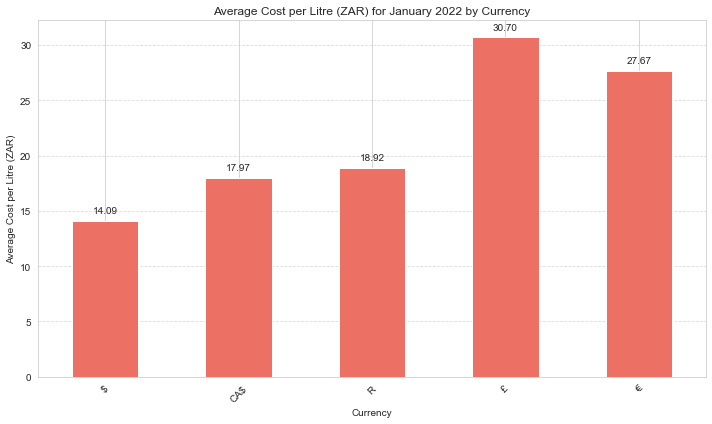

In [38]:
output_folder = './Plots/Plots[4.2-1]'

# Filter data for January 2022
df_jan_2022 = df_top_5_curr_cleaned[df_top_5_curr_cleaned['date_fueled'].dt.month == 1]
df_jan_2022 = df_jan_2022[df_jan_2022['date_fueled'].dt.year == 2022]

# Calculate average cost per litre (ZAR) by currency
average_cost_per_litre = df_jan_2022.groupby('currency')['cost_per_litre_zar'].mean()

print(f'Average cost per litre (ZAR) for January 2022 by currency: {average_cost_per_litre}')

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_cost_per_litre.plot(kind='bar', color='#ec7063')
plt.title('Average Cost per Litre (ZAR) for January 2022 by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Cost per Litre (ZAR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i in range(len(average_cost_per_litre)):
    plt.text(i, average_cost_per_litre[i] + 0.5, f'{average_cost_per_litre[i]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()

plot_path = os.path.join(output_folder, 'average_cost_per_litre_jan_2022.png')
plt.savefig(plot_path)

plt.show()

[4.2] 2. Looking at the odometer readings, find examples of where users have missed logging a fill-up. Give a basic rule for identifying this, and estimate how many there are in the dataset.

In [39]:
df_odometer = df_top_5_curr_cleaned.copy()
df_odometer = df_odometer.sort_values(by=['user_id', 'date_fueled'])
df_odometer = df_odometer.dropna(subset=['odometer'])

df_odometer['odometer_diff'] = df_odometer.groupby('user_id')['odometer'].diff()
# more than 500 miles between two fill-ups
threshold = 500 
df_odometer['potential_missed_fill_up'] = df_odometer['odometer_diff'] > threshold
missed_fill_ups = df_odometer['potential_missed_fill_up'].sum()
print(f"Estimated number of potential missed fill-ups: {missed_fill_ups}")

display(df_odometer[['user_id', 'date_fueled', 'odometer', 'odometer_diff', 'potential_missed_fill_up']].head(20))

Estimated number of potential missed fill-ups: 327181


,user_id,date_fueled,odometer,odometer_diff,potential_missed_fill_up
515901,1000007,2021-02-07,104824.000,NaN,False
836193,100002,2011-12-19,73864.000,NaN,False
826125,100002,2012-01-03,74605.000,741.000,True
826958,100002,2012-01-05,75000.000,395.000,False
845844,100002,2012-01-19,76322.000,1322.000,True
850497,100002,2012-01-23,76733.000,411.000,False
844569,100002,2012-02-12,78909.000,2176.000,True
853167,100002,2012-02-13,79370.000,461.000,False
827784,100002,2012-03-08,82317.000,2947.000,True
840777,100002,2012-03-11,82723.000,406.000,False


A basic rule for identifying missed fill-ups is to calculate the difference in `odometer` readings between consecutive fill-ups. If the difference exceeds `500 miles`, it can be assumed that a fill-up was missed. This rule was applied by sorting the data by `user_id` and `date_fueled` to accurately calculate the odometer difference for each user's consecutive entries.

[4.2] 3. Plot the average distance (in km) per tank per country. Which country has the largest average distance? Provide some explanations for why this might be the case.

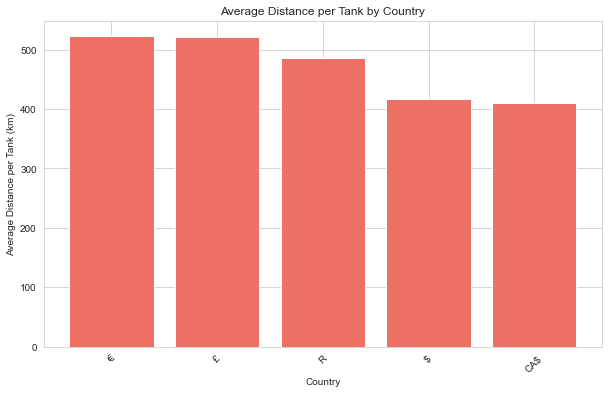

Country with the largest average distance per tank: € with 522.5677217120359 km.


In [40]:
output_folder = './Plots/Plots[4.2-3]'

average_distance_per_country = df_top_5_curr_cleaned.groupby('currency')['km_driven'].mean().reset_index()

# Sort values to identify the country with the largest average distance
average_distance_per_country = average_distance_per_country.sort_values(by='km_driven', ascending=False)

# Plotting the average distance per tank per country
plt.figure(figsize=(10, 6))
plt.bar(average_distance_per_country['currency'], average_distance_per_country['km_driven'], color='#ec7063')
plt.xlabel('Country')
plt.ylabel('Average Distance per Tank (km)')
plt.title('Average Distance per Tank by Country')
plt.xticks(rotation=45)

plot_path = os.path.join(output_folder, 'Average Distance per Tank by Country.png')
plt.savefig(plot_path)

plt.show()

# Identify the country with the largest average distance
largest_avg_distance_country = average_distance_per_country.iloc[0]
print(f"Country with the largest average distance per tank: {largest_avg_distance_country['currency']} with {largest_avg_distance_country['km_driven']} km.")

[4.2] 4. Do newer vehicles drive further distances between fill-ups? Provide a plot to show this.

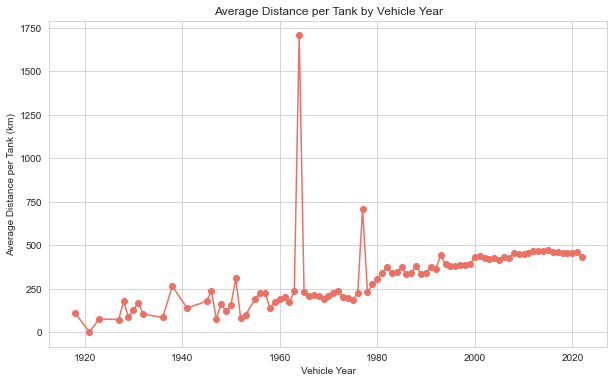

In [41]:
df_year = df_top_5_curr_cleaned.copy()

df_year['year'] = pd.to_datetime(df_year['year'], format='%Y', errors='coerce')

df_year = df_year.dropna(subset=['year'])
df_year['year'] = df_year['year'].dt.year
average_distance_per_year = df_year.groupby('year')['km_driven'].mean().reset_index()

output_folder = './Plots/Plots[4.2-4]'
plt.figure(figsize=(10, 6))
plt.plot(average_distance_per_year['year'], average_distance_per_year['km_driven'], marker='o', linestyle='-', color='#ec7063')
plt.xlabel('Vehicle Year')
plt.ylabel('Average Distance per Tank (km)')
plt.title('Average Distance per Tank by Vehicle Year')
plt.grid(True)

plot_path = os.path.join(output_folder, 'Average Distance per Tank by Vehicle Year.png')
plt.savefig(plot_path)

plt.show()

[4.2] 5. Take the top 5 most popular vehicles in SA (ie, those with currency set to R). Compute their fuel efficiency and discuss whether these values are realistic. 

In [42]:
df_sa = df_top_5_curr_cleaned.copy()
df_sa = df_top_5_curr_cleaned[df_top_5_curr_cleaned['currency'] == 'R']

vehicle_popularity = df_sa['make'].value_counts()
top_5_vehicles = vehicle_popularity.head(5).index
df_top_vehicles = df_sa[df_sa['make'].isin(top_5_vehicles)].copy()

average_fuel_efficiency = df_top_vehicles.groupby('make')['litres_per_100km'].mean().reset_index()
average_fuel_efficiency.columns = ['make', 'average_fuel_efficiency']
print("Top 5 most popular vehicles and their average fuel efficiency (km per liter):")
display(average_fuel_efficiency[['make', 'average_fuel_efficiency']])

Top 5 most popular vehicles and their average fuel efficiency (km per liter):


,make,average_fuel_efficiency
0,bmw,10.007
1,ford,11.865
2,nissan,11.280
3,toyota,11.473
4,volkswagen,9.649


[4.2] 6. Which vehicles are the most fuel efficient in each country? (Make sure the values are reasonable!!! You can look up values of fuel efficiency online to do a sanity check, but a value of 1l per 100km, or 100l per 100km are clearly wrong). 

In [43]:
currencies = ['$', '£', '€', 'CA$', 'R']

top_5_fuel_efficient_vehicles = []

for currency in currencies:
    df_currency = df_top_5_curr_cleaned[df_top_5_curr_cleaned['currency'] == currency].copy()
    # df_currency = df_currency[(df_currency['km_driven'] != 0) & (df_currency['litres_filled'] != 0)]
    # df_currency['fuel_efficiency'] = df_currency['km_driven'] / df_currency['litres_filled']
    average_fuel_efficiency = df_currency.groupby('make')['litres_per_100km'].mean().reset_index()
    average_fuel_efficiency.columns = ['make', 'average_fuel_efficiency']
    average_fuel_efficiency['currency'] = currency
    
    top_5 = average_fuel_efficiency.nsmallest(5, 'average_fuel_efficiency')
    top_5_fuel_efficient_vehicles.append(top_5)

final_top_5_df = pd.concat(top_5_fuel_efficient_vehicles, ignore_index=True)
print("Top 5 most fuel-efficient vehicles by currency")
display(final_top_5_df[['make', 'average_fuel_efficiency', 'currency']])


Top 5 most fuel-efficient vehicles by currency


,make,average_fuel_efficiency,currency
0,peugeot,7.399,$
1,citroen,7.622,$
2,renault,7.985,$
3,fiat,8.521,$
4,opel,8.642,$
5,hyundai,7.261,£
6,kia,7.433,£
7,honda,7.787,£
8,toyota,7.937,£
9,mini,7.976,£


[4.2] 7. Plot the difference in fuel efficiency for the top 5 Canadian vehicles between seasons. Would you expect to see big differences, and do you see them?

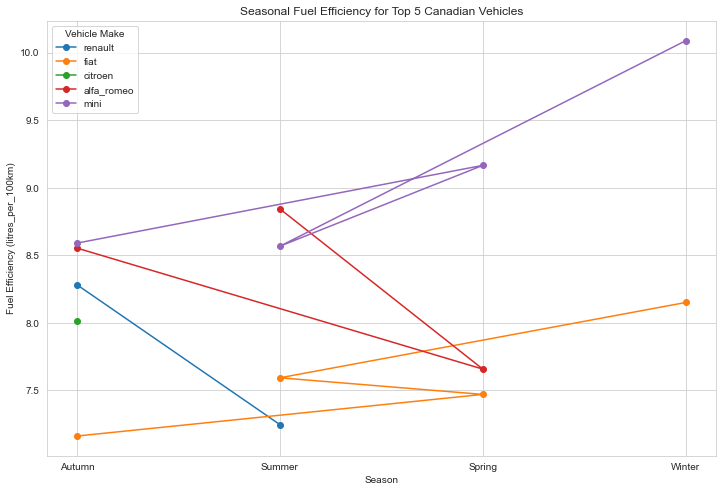

In [45]:
# df_canada = df_top_5_curr_cleaned[df_top_5_curr_cleaned['currency'] == 'CA$'].copy()
# df_canada = df_canada[(df_canada['km_driven'] != 0) & (df_canada['litres_filled'] != 0)]
# df_canada['fuel_efficiency'] = df_canada['km_driven'] / df_canada['litres_filled']

# df_canada['month'] = (df_canada['date_fueled']).dt.month
# #Canadian seasons - winter is December
# df_canada['season'] = df_canada['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
#                                                else 'Spring' if x in [3, 4, 5]
#                                                else 'Summer' if x in [6, 7, 8]
#                                                else 'Autumn')

# seasonal_efficiency = df_canada.groupby(['make', 'season'])['fuel_efficiency'].mean().reset_index()
# overall_efficiency = df_canada.groupby('make')['fuel_efficiency'].mean().reset_index()
# top_5_makes = overall_efficiency.nsmallest(5, 'fuel_efficiency')['make']
# seasonal_efficiency_top_5 = seasonal_efficiency[seasonal_efficiency['make'].isin(top_5_makes)]

# output_folder = './Plots/Plots[4.2-7]'
# plt.figure(figsize=(12, 8))
# for make in top_5_makes:
#     make_data = seasonal_efficiency_top_5[seasonal_efficiency_top_5['make'] == make]
#     plt.plot(make_data['season'], make_data['fuel_efficiency'], marker='o', label=make)
# plt.title('Seasonal Fuel Efficiency for Top 5 Canadian Vehicles')
# plt.xlabel('Season')
# plt.ylabel('Fuel Efficiency (km per liter)')
# plt.legend(title='Vehicle Make')
# plt.grid(True)

# plot_path = os.path.join(output_folder, 'Seasonal Fuel Efficiency for Top 5 Canadian Vehicles.png')
# plt.savefig(plot_path)

# plt.show()

df_canada = df_top_5_curr_cleaned[df_top_5_curr_cleaned['currency'] == 'CA$'].copy()
# df_canada = df_canada[(df_canada['km_driven'] != 0) & (df_canada['litres_filled'] != 0)]
# df_canada['fuel_efficiency'] = df_canada['km_driven'] / df_canada['litres_filled']

df_canada['month'] = (df_canada['date_fueled']).dt.month
#Canadian seasons - winter is December
df_canada['season'] = df_canada['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                               else 'Spring' if x in [3, 4, 5]
                                               else 'Summer' if x in [6, 7, 8]
                                               else 'Autumn')

seasonal_efficiency = df_canada.groupby(['make', 'season'])['litres_per_100km'].mean().reset_index()
overall_efficiency = df_canada.groupby('make')['litres_per_100km'].mean().reset_index()
top_5_makes = overall_efficiency.nsmallest(5, 'litres_per_100km')['make']
seasonal_efficiency_top_5 = seasonal_efficiency[seasonal_efficiency['make'].isin(top_5_makes)]

output_folder = './Plots/Plots[4.2-7]'
plt.figure(figsize=(12, 8))
for make in top_5_makes:
    make_data = seasonal_efficiency_top_5[seasonal_efficiency_top_5['make'] == make]
    plt.plot(make_data['season'], make_data['litres_per_100km'], marker='o', label=make)
plt.title('Seasonal Fuel Efficiency for Top 5 Canadian Vehicles')
plt.xlabel('Season')
plt.ylabel('Fuel Efficiency (litres_per_100km)')
plt.legend(title='Vehicle Make')
plt.grid(True)

plot_path = os.path.join(output_folder, 'Seasonal Fuel Efficiency for Top 5 Canadian Vehicles.png')
plt.savefig(plot_path)

plt.show()

[4.2] 8. Show the correlations between fuel efficiency and other features. You should find that there is a relative strongly correlation with distance travelled, the age of the vehicle, and the model of vehicle. 

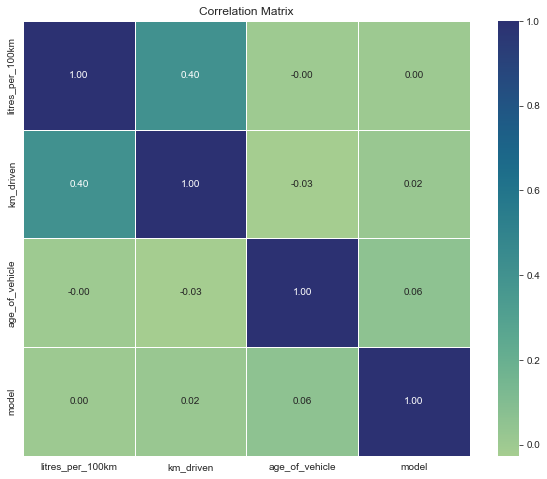

In [47]:
'''
This cell reuses and edits df_cleaned 

Note: fuel efficiency is the same as litres per 100 km
'''

df_top_5_curr_cleaned = df_top_5_curr_cleaned.copy()

df_top_5_curr_cleaned['year'] = pd.to_datetime(df_top_5_curr_cleaned['year'], format='%Y', errors='coerce')
df_top_5_curr_cleaned = df_top_5_curr_cleaned.dropna(subset=['year'])
df_top_5_curr_cleaned['year'] = df_top_5_curr_cleaned['year'].dt.year

current_year = datetime.now().year
df_top_5_curr_cleaned['age_of_vehicle'] = current_year - df_top_5_curr_cleaned['year']
df_top_5_curr_cleaned['litres_per_100km'] = df_top_5_curr_cleaned['km_driven'] / df_top_5_curr_cleaned['litres_filled']
df_top_5_curr_cleaned['model'] = pd.factorize(df_top_5_curr_cleaned['model'])[0]


correlation_matrix = df_top_5_curr_cleaned[['litres_per_100km', 'km_driven', 'age_of_vehicle', 'model']].corr()
output_folder = './Plots/Plots[4.2-8]'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

plot_path = os.path.join(output_folder, 'Correlation Matrix.png')
plt.savefig(plot_path)

plt.show()


[4.2] 9. Use a random forest to get a list of the most important variables. How different are they from each other, and how do these relate to the variables from the correlations above?

Feature Importances:
                  Feature  Importance
4                     mpg       1.000
13                user_id       0.000
6                user_url       0.000
11                  model       0.000
0                odometer       0.000
3             total_spent       0.000
10                   make       0.000
12                   year       0.000
8       total_spent_float       0.000
15          litres_filled       0.000
1                 gallons       0.000
17         cost_per_litre       0.000
7   cost_per_gallon_float       0.000
18     cost_per_litre_zar       0.000
19         age_of_vehicle       0.000
2         cost_per_gallon       0.000
5                   miles       0.000
16              km_driven       0.000
14          currency_type       0.000
9                currency       0.000

Correlations with litres_per_100km:
litres_per_100km         1.000
mpg                      1.000
miles                    0.799
km_driven                0.799
cost_per_gallon     

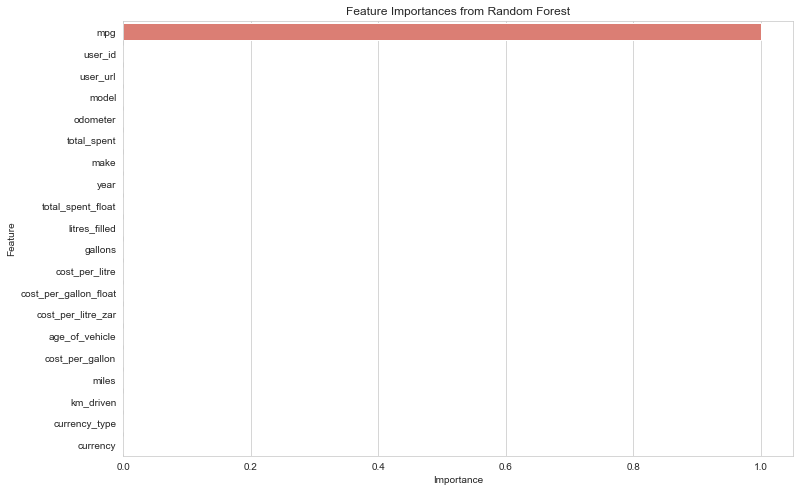

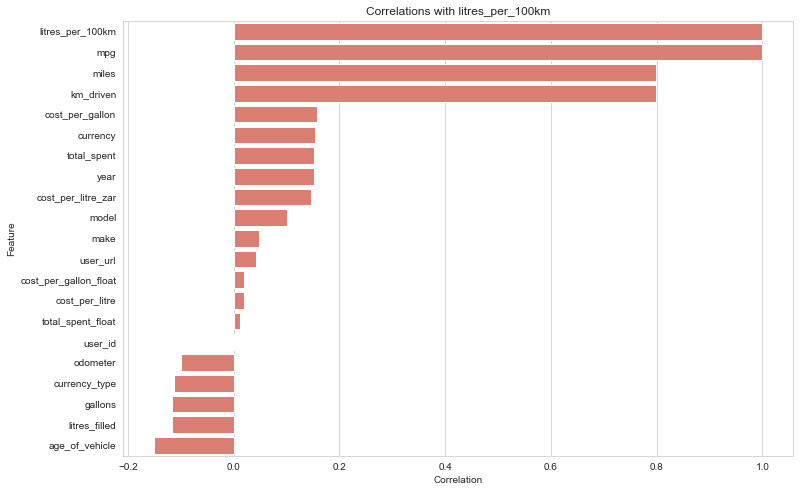

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df_top_5_curr_cleaned is already loaded
df = df_top_5_curr_cleaned.copy()

# Drop rows with NaN values in the target variable
df = df.dropna()

# Drop datetime columns for this analysis
df = df.drop(columns=['date_fueled', 'date_captured'])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Define features and target
X = df.drop(columns=['litres_per_100km'])
y = df['litres_per_100km'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Calculate correlations
correlations = df.corr()['litres_per_100km'].sort_values(ascending=False)

print("\nCorrelations with litres_per_100km:")
print(correlations)

output_folder = './Plots/Plots[4.2-9]'
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='#ec7063')
plt.title('Feature Importances from Random Forest')

plot_path = os.path.join(output_folder, 'Feature Importances from Random Forest.png')
plt.savefig(plot_path)
plt.show()

# Plot correlations
plt.figure(figsize=(12, 8))
correlation_df = correlations.reset_index().rename(columns={'index': 'Feature', 'litres_per_100km': 'Correlation'})
sns.barplot(x='Correlation', y='Feature', data=correlation_df, color='#ec7063')
plt.title('Correlations with litres_per_100km')

plot_path = os.path.join(output_folder, 'Correlations with litres_per_100km.png')
plt.savefig(plot_path)
plt.show()

#### Question 4.3 Fuel Usage in SA

[4.3] 1. Filter the above dataset to focus on SA drivers.

In [49]:
south_african_drivers_df = df_top_5_curr_cleaned.copy()
south_african_drivers_df = south_african_drivers_df.drop_duplicates(subset ='user_url')
south_african_drivers_df = south_african_drivers_df.query("currency == 'R'")

display(south_african_drivers_df.head())

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,...,model,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km,cost_per_litre,cost_per_litre_zar,age_of_vehicle
822529,2022-04-05,2022-04-05,78429.000,10.567,R73.85,R780.40,0.000,0.000,https://www.somewebsite.com/ford/transit_conne...,73.850,...,8,2015,1103772,Other,40.000,0.000,0.000,19.509,19.509,9
822530,2013-06-06,2013-06-08,NaN,17.937,R47.05,R843.99,23.300,418.400,https://www.somewebsite.com/land_rover/discove...,47.050,...,86,1996,123580,Other,67.899,673.348,9.917,12.429,12.429,28
822531,2019-01-23,2019-02-01,169070.000,22.011,R54.59,"R1,201.47",0.000,0.000,https://www.somewebsite.com/nissan/patrol/1999...,54.590,...,257,1999,254197,Other,83.321,0.000,0.000,14.421,14.421,25
822532,2018-08-12,2019-08-04,41111.000,6.763,R60.19,R407.04,40.700,275.254,https://www.somewebsite.com/ford/ecosport/2013...,60.190,...,183,2013,942891,Other,25.601,442.977,17.303,15.901,15.901,11
822533,2016-06-16,2016-06-16,2430.000,18.011,R48.45,R872.69,15.500,279.171,https://www.somewebsite.com/land_rover/discove...,48.450,...,86,2016,426622,Other,68.179,449.280,6.590,12.799,12.799,8


[4.3] 2. Plot the fuel prices over time for SA.

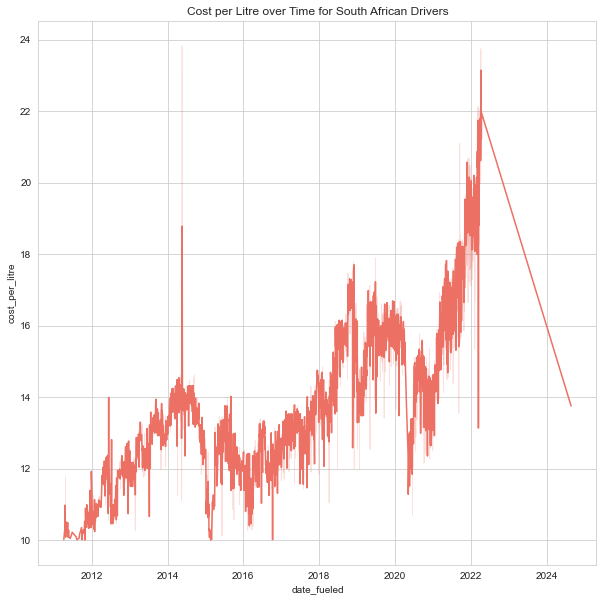

In [50]:
output_folder = './Plots/Plots[4.3-2]'
plt.figure(figsize=(10,10))
sns.lineplot(data = south_african_drivers_df, x ="date_fueled", y="cost_per_litre", color='#ec7063')
plt.title('Cost per Litre over Time for South African Drivers')

plot_path = os.path.join(output_folder, 'Cost per Litre over Time for South African Drivers.png')
plt.savefig(plot_path)

The fuel price has generally increased over time in South Africa, with there being certain peaks and dips in the price. Specifically the price peaked in 2014, beginning of 2016, 2019 and again in 2022. The price also dipped in 2015, 2016, 2017, 2019 and late 2020/2021.

[4.3] 3. Using a suitable plot, show if the difference in the number of people refueling on a Tuesday vs other days. 

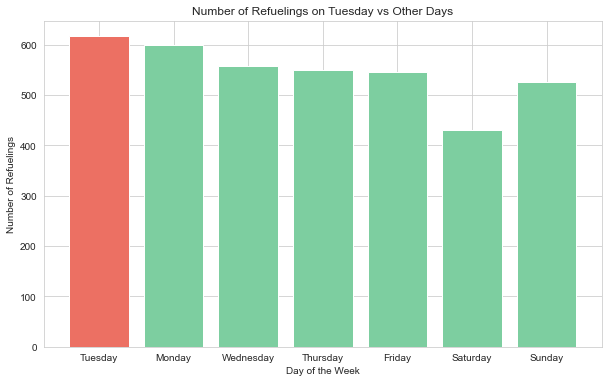

Refuelings on Tuesday: 617
Refuelings on Monday: 599
Refuelings on Wednesday: 558
Refuelings on Thursday: 549
Refuelings on Friday: 546
Refuelings on Saturday: 430
Refuelings on Sunday: 526


In [53]:
# Filter by each weekday
monday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 0]
tuesday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 1]
wednesday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 2]
thursday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 3]
friday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 4]
saturday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 5]
sunday_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 6]

# Count the number of refuelings for each day
tuesday_count = tuesday_df["user_url"].count()
monday_count = monday_df["user_url"].count()
wednesday_count = wednesday_df["user_url"].count()
thursday_count = thursday_df["user_url"].count()
friday_count = friday_df["user_url"].count()
saturday_count = saturday_df["user_url"].count()
sunday_count = sunday_df["user_url"].count()

# Prepare the data for plotting
days = ["Tuesday", "Monday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
num_refueling_per_day = [tuesday_count, monday_count, wednesday_count, thursday_count, friday_count, saturday_count, sunday_count]

# Plot
plt.figure(figsize=(10, 6))
colors = ['#ec7063' if day == "Tuesday" else '#7dcea0' for day in days]  # Highlight Tuesday in red, others in green

plt.bar(days, num_refueling_per_day, color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Refuelings')
plt.title('Number of Refuelings on Tuesday vs Other Days')

# Save the plot to the output folder
output_folder = './Plots/Plots[4.3-3]'
os.makedirs(output_folder, exist_ok=True)
plot_path = os.path.join(output_folder, 'Refuelings_Tuesday_vs_Other_Days.png')
plt.savefig(plot_path)
plt.show()

# Print the comparison
print(f"Refuelings on Tuesday: {tuesday_count}")
for i, day in enumerate(days[1:], start=1):
    print(f"Refuelings on {day}: {num_refueling_per_day[i]}")


More people refueled on a Tuesday compared to any other day.

[4.3] 4. Now reduce your dataset to only the entries on the 1st Tuesday and 1st
Wednesday in SA every month.

In [54]:
wed_df = south_african_drivers_df[south_african_drivers_df["date_fueled"].dt.weekday == 2]
tues_wed_df = pd.concat([wed_df,tuesday_df])
first_tues_wed_df = tues_wed_df[tues_wed_df["date_fueled"].dt.day < 7]
first_tues_wed_df = first_tues_wed_df[first_tues_wed_df["cost_per_litre"]!=0.0]
sorted_first_tues_wed_df = first_tues_wed_df.sort_values("date_fueled", ignore_index=True)
sorted_first_tues_wed_df

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,...,model,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km,cost_per_litre,cost_per_litre_zar,age_of_vehicle
0,2011-10-05,2011-10-05,9403.000,18.794,R38.84,R729.92,20.600,387.156,https://www.somewebsite.com/nissan/np300/2011/...,38.840,...,1450,2011,76782,Other,71.143,623.066,8.758,10.260,10.260,13
1,2011-11-01,2011-11-01,152242.000,9.029,R38.76,R349.99,0.000,0.000,https://www.somewebsite.com/nissan/sentra/1995...,38.760,...,159,1995,95886,Other,34.178,0.000,0.000,10.239,10.239,29
2,2011-11-01,2011-11-02,97918.000,13.790,R38.76,R534.54,11.500,158.585,https://www.somewebsite.com/bmw/318i/2001/83609,38.760,...,483,2001,83609,Other,52.201,255.217,4.889,10.239,10.239,23
3,2011-11-02,2011-11-09,25341.000,9.867,R40.12,R395.91,27.500,271.343,https://www.somewebsite.com/suzuki/jimny/2010/...,40.120,...,603,2010,64386,Other,37.351,436.682,11.691,10.599,10.599,14
4,2011-11-02,2011-11-02,144978.000,2.576,R38.84,R100.05,0.000,0.000,https://www.somewebsite.com/bmw/318i/1994/95779,38.840,...,483,1994,95779,Other,9.751,0.000,0.000,10.260,10.260,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-04-05,2022-04-05,78429.000,10.567,R73.85,R780.40,0.000,0.000,https://www.somewebsite.com/ford/transit_conne...,73.850,...,8,2015,1103772,Other,40.000,0.000,0.000,19.509,19.509,9
272,2022-04-05,2022-04-05,NaN,17.007,R81.76,"R1,390.61",14.200,242.000,https://www.somewebsite.com/toyota/hilux/2006/...,81.760,...,576,2006,411959,Other,64.378,389.460,6.050,21.599,21.599,18
273,2022-04-05,2022-04-08,59325.000,13.520,R73.17,R989.31,23.500,317.720,https://www.somewebsite.com/isuzu/d-max/2016/1...,73.170,...,144,2016,1124531,Other,51.179,511.320,9.991,19.329,19.329,8
274,2022-04-05,2022-04-05,136412.000,5.071,R78.89,R400.00,0.000,0.000,https://www.somewebsite.com/mitsubishi/triton/...,78.890,...,954,2007,1021137,Other,19.196,0.000,0.000,20.841,20.841,17


[4.3] 5. For each Tuesday and Wednesday, add an indicator for whether the price
goes up or the price goes down that month.

In [55]:
price_change_indicator_df = sorted_first_tues_wed_df.copy()
price_change_indicator_df['price_change_indicator'] = ""

for i in range(len(price_change_indicator_df)):
    if i == 0:
        continue
    else:
        prev_index = i-1
        if price_change_indicator_df.loc[i,'cost_per_litre'] < price_change_indicator_df.loc[prev_index,'cost_per_litre']:
            price_change_indicator_df.loc[i,'price_change_indicator'] = "down"
        elif price_change_indicator_df.loc[i,"cost_per_litre"] > price_change_indicator_df.loc[i-1,"cost_per_litre"]:
            price_change_indicator_df.loc[i,"price_change_indicator"] = "up"
        else:
            price_change_indicator_df.loc[i,"price_change_indicator"] = "no change"
            
display(price_change_indicator_df)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,...,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km,cost_per_litre,cost_per_litre_zar,age_of_vehicle,price_change_indicator
0,2011-10-05,2011-10-05,9403.000,18.794,R38.84,R729.92,20.600,387.156,https://www.somewebsite.com/nissan/np300/2011/...,38.840,...,2011,76782,Other,71.143,623.066,8.758,10.260,10.260,13,
1,2011-11-01,2011-11-01,152242.000,9.029,R38.76,R349.99,0.000,0.000,https://www.somewebsite.com/nissan/sentra/1995...,38.760,...,1995,95886,Other,34.178,0.000,0.000,10.239,10.239,29,down
2,2011-11-01,2011-11-02,97918.000,13.790,R38.76,R534.54,11.500,158.585,https://www.somewebsite.com/bmw/318i/2001/83609,38.760,...,2001,83609,Other,52.201,255.217,4.889,10.239,10.239,23,no change
3,2011-11-02,2011-11-09,25341.000,9.867,R40.12,R395.91,27.500,271.343,https://www.somewebsite.com/suzuki/jimny/2010/...,40.120,...,2010,64386,Other,37.351,436.682,11.691,10.599,10.599,14,up
4,2011-11-02,2011-11-02,144978.000,2.576,R38.84,R100.05,0.000,0.000,https://www.somewebsite.com/bmw/318i/1994/95779,38.840,...,1994,95779,Other,9.751,0.000,0.000,10.260,10.260,30,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-04-05,2022-04-05,78429.000,10.567,R73.85,R780.40,0.000,0.000,https://www.somewebsite.com/ford/transit_conne...,73.850,...,2015,1103772,Other,40.000,0.000,0.000,19.509,19.509,9,down
272,2022-04-05,2022-04-05,NaN,17.007,R81.76,"R1,390.61",14.200,242.000,https://www.somewebsite.com/toyota/hilux/2006/...,81.760,...,2006,411959,Other,64.378,389.460,6.050,21.599,21.599,18,up
273,2022-04-05,2022-04-08,59325.000,13.520,R73.17,R989.31,23.500,317.720,https://www.somewebsite.com/isuzu/d-max/2016/1...,73.170,...,2016,1124531,Other,51.179,511.320,9.991,19.329,19.329,8,down
274,2022-04-05,2022-04-05,136412.000,5.071,R78.89,R400.00,0.000,0.000,https://www.somewebsite.com/mitsubishi/triton/...,78.890,...,2007,1021137,Other,19.196,0.000,0.000,20.841,20.841,17,up


[4.3] 6. Do more people refuel on the first Wednesday of the month when the
prices goes down? 

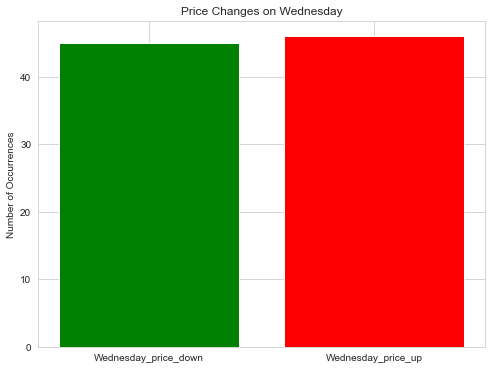

In [56]:
# Count the occurrences of price changes on Wednesday
num_wed_price_down = len(price_change_indicator_df.query('date_fueled.dt.weekday == 2 & price_change_indicator == "down"'))
num_wed_price_up = len(price_change_indicator_df.query('date_fueled.dt.weekday == 2 & price_change_indicator == "up"'))

labels = ["Wednesday_price_down", "Wednesday_price_up"]
values = [num_wed_price_down, num_wed_price_up]

output_folder = './Plots/Plots[4.3-6]'
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["green", "red"])  # Green for down, red for up

plt.ylabel("Number of Occurrences")
plt.title("Price Changes on Wednesday")

output_path = os.path.join(output_folder, 'Price Changes on Wednesday.png')
plt.savefig(output_path)

plt.show()


No, more people do not refuel on the first Wednesday of the month when the price goes down.


[4.3] 7. Do more people refuel on the first Tuesday of the month when the prices
goes up?

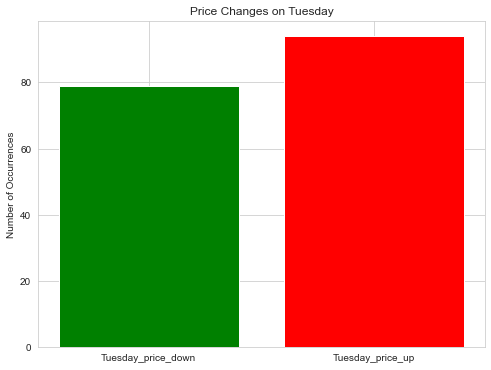

In [57]:
# Count the occurrences of price changes on Tuesday
num_tues_price_down = len(price_change_indicator_df.query('date_fueled.dt.weekday == 1 & price_change_indicator == "down"'))
num_tues_price_up = len(price_change_indicator_df.query('date_fueled.dt.weekday == 1 & price_change_indicator == "up"'))

labels = ["Tuesday_price_down", "Tuesday_price_up"]
values = [num_tues_price_down, num_tues_price_up]

output_folder = './Plots/Plots[4.3-7]'
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["green", "red"])  # Green for down, red for up

plt.ylabel("Number of Occurrences")
plt.title("Price Changes on Tuesday")

output_path = os.path.join(output_folder, 'Price Changes on Tuesday.png')
plt.savefig(output_path)

plt.show()


Yes, more people refuel on a Tuesday when the price goes up.